In Amir(2012)[1], they measure the dependence of the relaxation both on time $t$ and on the "waiting time" $t_w$, during which an external perturbation has been applied. And the longer $t_w$ is, the slower the resulting relaxation.

In [38]:
import tamaas as tm
import tamaas.utils
import matplotlib.pyplot as plt
import numpy as np
import time

# parallel computation
tm.initialize(8)

# Initialize threads and fftw
tm.set_log_level(tm.LogLevel.info)  # Show progression of solver

# discretization
n = 512



# Surface generator
sg = tm.SurfaceGeneratorFilter2D([n, n])
sg.random_seed = 1

# Spectrum
sg.spectrum = tm.Isopowerlaw2D()

# Parameters
sg.spectrum.q0 = 4
sg.spectrum.q1 = 4
sg.spectrum.q2 = 256
sg.spectrum.hurst = 0.8



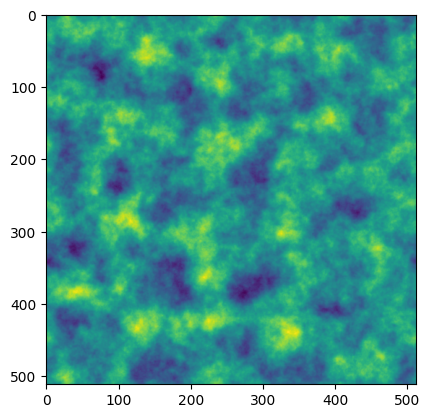

In [39]:

# Generating surface
surface = sg.buildSurface()
surface /= tm.Statistics2D.computeSpectralRMSSlope(surface)

np.save("finer_surface.npy", surface)

plt.imshow(surface)


In [40]:

# Domain size
L = 1.

model = tm.Model(tm.model_type.basic_2d, [L, L], [n, n])

model.E = 3
model.nu = 0.5
model.E_star


4.0

#### Tricky way to see deaging by local seperate model, it makes the surface like multiple springs, and remove the influence between different springs. 

P.S. This model requires smaller loading because the surface becomes "softer".

In [41]:


W = 1e-1

In [42]:

shear_modulus = [model.nu] * 50

characteristic_time = np.logspace(-1, 9, 50)


# time
t0 = 0
t1 = 100
time_steps = 600
dt = (t1 - t0) / time_steps

# Const loading
# W = 1e0


In [43]:


#solver
solver = tm.MaxwellViscoelastic(model, surface, 1e-12, dt, shear_modulus, characteristic_time)

model.operators['westergaard_neumann']['influence'][:] = 2 / model.E_star

Ac_tamaas = []

#solve for target pressure
p_target = W / (L**2) #avarge pressure
#solver.solve(p_target)

#reset the solver to avoid history accumulation
solver.reset()


start_time = time.perf_counter()

for t in np.linspace(t0, t1, time_steps):
    solver.solve(p_target)
    Ac_tamaas.append(tm.Statistics2D.contact(model.traction))
    print(np.mean(model.traction))

end_time = time.perf_counter()
execution_time = end_time - start_time
print("Execution time:", execution_time)
np.save("Ac_tamaas.npy", Ac_tamaas)

 Iter          Cost_f           Error


    0   -4.333261e-02    2.287595e+00
    7   -4.586506e-02    1.734180e-15
 Iter          Cost_f           Error
    0   -3.922213e-02    1.027862e-03
    2   -4.583957e-02    1.292489e-15
 Iter          Cost_f           Error
    0   -3.920837e-02    7.089196e-04
    2   -4.582200e-02    2.692338e-15
 Iter          Cost_f           Error
    0   -3.919795e-02    5.279791e-04
    2   -4.580892e-02    2.272069e-15
 Iter          Cost_f           Error
    0   -3.918961e-02    4.170351e-04
    2   -4.579859e-02    1.229833e-15
 Iter          Cost_f           Error
    0   -3.918267e-02    3.440014e-04


0.10000000000000005
0.10000000000000003
0.10000000000000003
0.10000000000000002
0.09999999999999996


    2   -4.579007e-02    1.670421e-15
 Iter          Cost_f           Error
    0   -3.917673e-02    2.929100e-04
    2   -4.578281e-02    1.525277e-15
 Iter          Cost_f           Error
    0   -3.917153e-02    2.553435e-04
    2   -4.577649e-02    2.865493e-15
 Iter          Cost_f           Error
    0   -3.916690e-02    2.265983e-04
    2   -4.577088e-02    1.472551e-15
 Iter          Cost_f           Error
    0   -3.916272e-02    2.038924e-04
    2   -4.576583e-02    2.248021e-15
 Iter          Cost_f           Error
    0   -3.915892e-02    1.854936e-04


0.10000000000000003
0.10000000000000005
0.09999999999999996
0.09999999999999994
0.1


    2   -4.576123e-02    2.102117e-15
 Iter          Cost_f           Error
    0   -3.915542e-02    1.702722e-04
    2   -4.575702e-02    1.903279e-15
 Iter          Cost_f           Error
    0   -3.915218e-02    1.574624e-04
    2   -4.575312e-02    1.448743e-15
 Iter          Cost_f           Error
    0   -3.914916e-02    1.465276e-04
    2   -4.574949e-02    2.569769e-15
 Iter          Cost_f           Error
    0   -3.914634e-02    1.370795e-04
    2   -4.574610e-02    1.494336e-15
 Iter          Cost_f           Error
    0   -3.914368e-02    1.288306e-04
    2   -4.574291e-02    2.488625e-15


0.10000000000000003
0.10000000000000003
0.09999999999999998
0.09999999999999998
0.1


 Iter          Cost_f           Error
    0   -3.914117e-02    1.215634e-04
    2   -4.573990e-02    1.449769e-15
 Iter          Cost_f           Error
    0   -3.913879e-02    1.151103e-04
    2   -4.573705e-02    1.978929e-15
 Iter          Cost_f           Error
    0   -3.913653e-02    1.093400e-04
    2   -4.573435e-02    1.445658e-15
 Iter          Cost_f           Error
    0   -3.913438e-02    1.041480e-04
    2   -4.573177e-02    1.298836e-15
 Iter          Cost_f           Error
    0   -3.913232e-02    9.945055e-05
    2   -4.572931e-02    1.484391e-15


0.09999999999999999
0.1
0.10000000000000006
0.1000000000000001
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.913036e-02    9.517892e-05
    2   -4.572695e-02    2.386536e-15
 Iter          Cost_f           Error
    0   -3.912847e-02    9.127756e-05
    2   -4.572470e-02    1.190892e-15
 Iter          Cost_f           Error
    0   -3.912665e-02    8.769910e-05
    2   -4.572253e-02    1.557799e-15
 Iter          Cost_f           Error
    0   -3.912491e-02    8.440471e-05
    2   -4.572044e-02    1.652047e-15
 Iter          Cost_f           Error
    0   -3.912322e-02    8.136114e-05
    2   -4.571842e-02    1.983152e-15
 Iter          Cost_f           Error
    0   -3.912160e-02    7.854061e-05


0.09999999999999994
0.10000000000000003
0.09999999999999998
0.10000000000000005
0.09999999999999998
0.10000000000000003


    2   -4.571648e-02    1.260638e-15
 Iter          Cost_f           Error
    0   -3.912002e-02    7.591919e-05
    2   -4.571460e-02    1.719541e-15
 Iter          Cost_f           Error
    0   -3.911850e-02    7.347602e-05
    2   -4.571278e-02    2.130544e-15
 Iter          Cost_f           Error
    0   -3.911703e-02    7.119321e-05
    2   -4.571102e-02    1.501486e-15
 Iter          Cost_f           Error
    0   -3.911560e-02    6.905541e-05
    2   -4.570932e-02    2.207598e-15
 Iter          Cost_f           Error
    0   -3.911421e-02    6.704891e-05
    1   -4.570766e-02    1.492167e-15
 Iter          Cost_f           Error
    0   -3.911286e-02    6.516189e-05


0.10000000000000005
0.09999999999999996
0.09999999999999999
0.09999999999999998
0.10000000000000002
0.1


    2   -4.570604e-02    1.293083e-15
 Iter          Cost_f           Error
    0   -3.911154e-02    6.338351e-05
    2   -4.570448e-02    1.483792e-15
 Iter          Cost_f           Error
    0   -3.911026e-02    6.170527e-05
    2   -4.570295e-02    1.283438e-15
 Iter          Cost_f           Error
    0   -3.910902e-02    6.011824e-05
    1   -4.570146e-02    1.469125e-15
 Iter          Cost_f           Error
    0   -3.910780e-02    5.861483e-05
    2   -4.570001e-02    1.300580e-15
 Iter          Cost_f           Error
    0   -3.910662e-02    5.718896e-05
    2   -4.569860e-02    1.289741e-15


0.1
0.09999999999999996
0.10000000000000002
0.1
0.09999999999999995


 Iter          Cost_f           Error
    0   -3.910546e-02    5.583456e-05
    2   -4.569722e-02    1.480146e-15
 Iter          Cost_f           Error
    0   -3.910433e-02    5.454635e-05
    2   -4.569587e-02    1.758064e-15
 Iter          Cost_f           Error
    0   -3.910322e-02    5.331932e-05
    2   -4.569455e-02    2.035682e-15
 Iter          Cost_f           Error
    0   -3.910214e-02    5.214931e-05
    1   -4.569326e-02    2.551362e-15
 Iter          Cost_f           Error
    0   -3.910108e-02    5.103237e-05
    1   -4.569200e-02    1.399199e-15


0.10000000000000002
0.10000000000000003
0.10000000000000005
0.10000000000000003
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.910004e-02    4.996489e-05
    2   -4.569076e-02    2.364364e-15
 Iter          Cost_f           Error
    0   -3.909903e-02    4.894359e-05
    2   -4.568955e-02    1.715981e-15
 Iter          Cost_f           Error
    0   -3.909803e-02    4.796551e-05
    2   -4.568837e-02    1.488673e-15
 Iter          Cost_f           Error
    0   -3.909706e-02    4.702788e-05
    2   -4.568720e-02    1.425861e-15
 Iter          Cost_f           Error
    0   -3.909610e-02    4.612828e-05
    2   -4.568606e-02    1.881088e-15
 Iter          Cost_f           Error
    0   -3.909516e-02    4.526433e-05


0.09999999999999996
0.10000000000000002
0.10000000000000005
0.09999999999999998
0.09999999999999998
0.09999999999999999


    2   -4.568494e-02    2.341685e-15
 Iter          Cost_f           Error
    0   -3.909424e-02    4.443394e-05
    2   -4.568384e-02    1.308850e-15
 Iter          Cost_f           Error
    0   -3.909333e-02    4.363496e-05
    1   -4.568277e-02    1.844089e-15
 Iter          Cost_f           Error
    0   -3.909245e-02    4.286621e-05
    1   -4.568171e-02    1.792017e-15
 Iter          Cost_f           Error
    0   -3.909157e-02    4.212540e-05
    1   -4.568066e-02    1.460544e-15
 Iter          Cost_f           Error
    0   -3.909071e-02    4.141119e-05
    2   -4.567964e-02    2.104737e-15


0.10000000000000002
0.09999999999999991
0.10000000000000005
0.10000000000000003
0.1


 Iter          Cost_f           Error
    0   -3.908987e-02    4.072216e-05
    2   -4.567863e-02    2.119623e-15
 Iter          Cost_f           Error
    0   -3.908904e-02    4.005701e-05
    2   -4.567764e-02    1.718102e-15
 Iter          Cost_f           Error
    0   -3.908822e-02    3.941440e-05
    2   -4.567667e-02    1.340391e-15
 Iter          Cost_f           Error
    0   -3.908741e-02    3.879326e-05
    2   -4.567571e-02    1.823167e-15
 Iter          Cost_f           Error
    0   -3.908662e-02    3.819248e-05
    1   -4.567477e-02    1.338252e-15


0.10000000000000005
0.10000000000000002
0.10000000000000007
0.1
0.1


 Iter          Cost_f           Error
    0   -3.908584e-02    3.761118e-05
    2   -4.567384e-02    2.236242e-15
 Iter          Cost_f           Error
    0   -3.908507e-02    3.704826e-05
    2   -4.567292e-02    3.172167e-15
 Iter          Cost_f           Error
    0   -3.908431e-02    3.650286e-05
    1   -4.567202e-02    1.522393e-15
 Iter          Cost_f           Error
    0   -3.908357e-02    3.597423e-05
    2   -4.567113e-02    3.450336e-15
 Iter          Cost_f           Error
    0   -3.908283e-02    3.546157e-05
    1   -4.567025e-02    1.604456e-15


0.09999999999999998
0.10000000000000003
0.10000000000000002
0.10000000000000009
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.908210e-02    3.496417e-05
    2   -4.566939e-02    1.275991e-15
 Iter          Cost_f           Error
    0   -3.908139e-02    3.448127e-05
    1   -4.566853e-02    1.099117e-15
 Iter          Cost_f           Error
    0   -3.908068e-02    3.401219e-05
    2   -4.566769e-02    1.321508e-15
 Iter          Cost_f           Error
    0   -3.907999e-02    3.355673e-05
    1   -4.566686e-02    1.373956e-15
 Iter          Cost_f           Error
    0   -3.907930e-02    3.311386e-05
    2   -4.566605e-02    1.541126e-15


0.1
0.1
0.10000000000000002
0.10000000000000005
0.1


 Iter          Cost_f           Error
    0   -3.907862e-02    3.268323e-05
    2   -4.566524e-02    1.661449e-15
 Iter          Cost_f           Error
    0   -3.907795e-02    3.226424e-05
    1   -4.566444e-02    1.290176e-15
 Iter          Cost_f           Error
    0   -3.907729e-02    3.185672e-05
    2   -4.566365e-02    1.193835e-15
 Iter          Cost_f           Error
    0   -3.907664e-02    3.145960e-05
    1   -4.566287e-02    1.423329e-15
 Iter          Cost_f           Error
    0   -3.907599e-02    3.107296e-05
    2   -4.566211e-02    2.133365e-15
 Iter          Cost_f           Error
    0   -3.907535e-02    3.069636e-05


0.10000000000000005
0.10000000000000006
0.09999999999999994
0.10000000000000005
0.10000000000000003
0.09999999999999999


    2   -4.566135e-02    1.979867e-15
 Iter          Cost_f           Error
    0   -3.907472e-02    3.032913e-05
    1   -4.566060e-02    1.336181e-15
 Iter          Cost_f           Error
    0   -3.907410e-02    2.997121e-05
    2   -4.565986e-02    1.474082e-15
 Iter          Cost_f           Error
    0   -3.907349e-02    2.962212e-05
    2   -4.565913e-02    1.418419e-15
 Iter          Cost_f           Error
    0   -3.907288e-02    2.928152e-05
    2   -4.565840e-02    1.430399e-15
 Iter          Cost_f           Error
    0   -3.907228e-02    2.894916e-05
    2   -4.565769e-02    2.768153e-15


0.09999999999999999
0.09999999999999999
0.1
0.10000000000000005
0.10000000000000006


 Iter          Cost_f           Error
    0   -3.907168e-02    2.862462e-05
    2   -4.565698e-02    1.408146e-15
 Iter          Cost_f           Error
    0   -3.907110e-02    2.830784e-05
    1   -4.565628e-02    1.904512e-15
 Iter          Cost_f           Error
    0   -3.907051e-02    2.799832e-05
    1   -4.565559e-02    1.278017e-15
 Iter          Cost_f           Error
    0   -3.906994e-02    2.769594e-05
    2   -4.565490e-02    2.070094e-15
 Iter          Cost_f           Error
    0   -3.906937e-02    2.740027e-05
    2   -4.565423e-02    1.962683e-15


0.09999999999999996
0.09999999999999996
0.09999999999999994
0.09999999999999995
0.09999999999999995
0.10000000000000007


 Iter          Cost_f           Error
    0   -3.906881e-02    2.711141e-05
    2   -4.565356e-02    1.646516e-15
 Iter          Cost_f           Error
    0   -3.906825e-02    2.682880e-05
    1   -4.565289e-02    1.424767e-15
 Iter          Cost_f           Error
    0   -3.906770e-02    2.655242e-05
    1   -4.565224e-02    1.522640e-15
 Iter          Cost_f           Error
    0   -3.906715e-02    2.628189e-05
    1   -4.565159e-02    1.307069e-15
 Iter          Cost_f           Error
    0   -3.906661e-02    2.601737e-05
    2   -4.565094e-02    1.211979e-15
 Iter          Cost_f           Error
    0   -3.906608e-02    2.575828e-05
    1   -4.565031e-02    2.438255e-15
 Iter          Cost_f           Error
    0   -3.906555e-02    2.550469e-05


0.10000000000000003
0.09999999999999998
0.09999999999999999
0.09999999999999999
0.10000000000000002
0.1


    1   -4.564968e-02    1.251190e-15
 Iter          Cost_f           Error
    0   -3.906503e-02    2.525629e-05
    2   -4.564905e-02    1.650271e-15
 Iter          Cost_f           Error
    0   -3.906451e-02    2.501297e-05
    1   -4.564843e-02    1.632984e-15
 Iter          Cost_f           Error
    0   -3.906399e-02    2.477460e-05
    1   -4.564782e-02    1.644507e-15
 Iter          Cost_f           Error
    0   -3.906348e-02    2.454090e-05
    1   -4.564722e-02    1.932576e-15
 Iter          Cost_f           Error
    0   -3.906298e-02    2.431196e-05
    1   -4.564661e-02    1.619528e-15
 Iter          Cost_f           Error
    0   -3.906248e-02    2.408788e-05


0.10000000000000003
0.10000000000000003
0.09999999999999999
0.09999999999999998
0.1
0.10000000000000002


    2   -4.564602e-02    1.305493e-15
 Iter          Cost_f           Error
    0   -3.906198e-02    2.386735e-05
    2   -4.564543e-02    2.096124e-15
 Iter          Cost_f           Error
    0   -3.906149e-02    2.365140e-05
    2   -4.564484e-02    1.285329e-15
 Iter          Cost_f           Error
    0   -3.906100e-02    2.343940e-05
    1   -4.564427e-02    1.481756e-15
 Iter          Cost_f           Error
    0   -3.906052e-02    2.323175e-05
    1   -4.564369e-02    1.721026e-15
 Iter          Cost_f           Error
    0   -3.906004e-02    2.302780e-05
    1   -4.564312e-02    1.286628e-15
 Iter          Cost_f           Error
    0   -3.905957e-02    2.282727e-05


0.1
0.09999999999999995
0.10000000000000003
0.09999999999999998
0.10000000000000003
0.10000000000000002


    1   -4.564256e-02    1.188844e-15
 Iter          Cost_f           Error
    0   -3.905910e-02    2.263100e-05
    2   -4.564200e-02    1.832518e-15
 Iter          Cost_f           Error
    0   -3.905863e-02    2.243810e-05
    1   -4.564144e-02    1.447810e-15
 Iter          Cost_f           Error
    0   -3.905817e-02    2.224858e-05
    1   -4.564090e-02    1.429278e-15
 Iter          Cost_f           Error
    0   -3.905771e-02    2.206244e-05
    2   -4.564035e-02    1.185782e-15
 Iter          Cost_f           Error
    0   -3.905726e-02    2.187957e-05
    1   -4.563981e-02    1.943884e-15
 Iter          Cost_f           Error
    0   -3.905681e-02    2.169989e-05


0.1
0.10000000000000005
0.10000000000000005
0.09999999999999994
0.10000000000000003
0.09999999999999995


    2   -4.563927e-02    1.511964e-15
 Iter          Cost_f           Error
    0   -3.905636e-02    2.152332e-05
    1   -4.563874e-02    1.291776e-15
 Iter          Cost_f           Error
    0   -3.905592e-02    2.134979e-05
    1   -4.563821e-02    1.314579e-15
 Iter          Cost_f           Error
    0   -3.905548e-02    2.117914e-05
    2   -4.563769e-02    1.619011e-15
 Iter          Cost_f           Error
    0   -3.905504e-02    2.101142e-05
    1   -4.563717e-02    1.597738e-15
 Iter          Cost_f           Error
    0   -3.905461e-02    2.084649e-05
    1   -4.563666e-02    1.168568e-15
 Iter          Cost_f           Error
    0   -3.905418e-02    2.068427e-05
    2   -4.563615e-02    1.984630e-15


0.10000000000000007
0.10000000000000006
0.10000000000000005
0.1
0.09999999999999999
0.09999999999999995


 Iter          Cost_f           Error
    0   -3.905375e-02    2.052473e-05
    2   -4.563564e-02    1.700749e-15
 Iter          Cost_f           Error
    0   -3.905333e-02    2.036775e-05
    1   -4.563513e-02    1.445195e-15
 Iter          Cost_f           Error
    0   -3.905291e-02    2.021331e-05
    2   -4.563464e-02    1.702043e-15
 Iter          Cost_f           Error
    0   -3.905250e-02    2.006134e-05
    1   -4.563414e-02    1.252246e-15
 Iter          Cost_f           Error
    0   -3.905208e-02    1.991177e-05
    1   -4.563365e-02    1.658251e-15
 Iter          Cost_f           Error
    0   -3.905167e-02    1.976411e-05


0.10000000000000005
0.09999999999999996
0.09999999999999998
0.1
0.09999999999999996
0.1


    1   -4.563316e-02    1.236010e-15
 Iter          Cost_f           Error
    0   -3.905126e-02    1.961964e-05
    1   -4.563267e-02    1.838171e-15
 Iter          Cost_f           Error
    0   -3.905086e-02    1.947696e-05
    1   -4.563219e-02    1.497168e-15
 Iter          Cost_f           Error
    0   -3.905046e-02    1.933601e-05
    2   -4.563172e-02    1.972126e-15
 Iter          Cost_f           Error
    0   -3.905006e-02    1.919810e-05
    1   -4.563124e-02    2.396985e-15
 Iter          Cost_f           Error
    0   -3.904966e-02    1.906182e-05
    2   -4.563077e-02    1.285570e-15
 Iter          Cost_f           Error
    0   -3.904927e-02    1.892759e-05


0.09999999999999998
0.10000000000000002
0.10000000000000006
0.1
0.09999999999999999
0.09999999999999999


    1   -4.563030e-02    1.408919e-15
 Iter          Cost_f           Error
    0   -3.904888e-02    1.879536e-05
    2   -4.562984e-02    1.547408e-15
 Iter          Cost_f           Error
    0   -3.904849e-02    1.866499e-05
    2   -4.562938e-02    1.490420e-15
 Iter          Cost_f           Error
    0   -3.904811e-02    1.853666e-05
    2   -4.562892e-02    1.520327e-15
 Iter          Cost_f           Error
    0   -3.904773e-02    1.841011e-05
    1   -4.562846e-02    2.410561e-15
 Iter          Cost_f           Error
    0   -3.904735e-02    1.828542e-05
    2   -4.562801e-02    1.866824e-15


0.1
0.09999999999999995
0.10000000000000005
0.10000000000000002
0.10000000000000005


 Iter          Cost_f           Error
    0   -3.904697e-02    1.816251e-05
    1   -4.562756e-02    2.023387e-15
 Iter          Cost_f           Error
    0   -3.904659e-02    1.804113e-05
    2   -4.562712e-02    1.486503e-15
 Iter          Cost_f           Error
    0   -3.904622e-02    1.792187e-05
    1   -4.562668e-02    2.267680e-15
 Iter          Cost_f           Error
    0   -3.904585e-02    1.780413e-05
    2   -4.562624e-02    1.436458e-15
 Iter          Cost_f           Error
    0   -3.904549e-02    1.768787e-05
    1   -4.562580e-02    1.990794e-15
 Iter          Cost_f           Error
    0   -3.904512e-02    1.757309e-05
    1   -4.562537e-02    2.011575e-15


0.1
0.09999999999999996
0.09999999999999998
0.10000000000000006
0.10000000000000002
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.904476e-02    1.746028e-05
    1   -4.562493e-02    1.480703e-15
 Iter          Cost_f           Error
    0   -3.904440e-02    1.734880e-05
    1   -4.562451e-02    1.714243e-15
 Iter          Cost_f           Error
    0   -3.904404e-02    1.723883e-05
    1   -4.562408e-02    1.884447e-15
 Iter          Cost_f           Error
    0   -3.904368e-02    1.713033e-05
    2   -4.562366e-02    1.720816e-15
 Iter          Cost_f           Error
    0   -3.904333e-02    1.702327e-05
    1   -4.562324e-02    1.347186e-15
 Iter          Cost_f           Error
    0   -3.904298e-02    1.691758e-05


0.10000000000000006
0.1
0.10000000000000006
0.10000000000000002
0.10000000000000002
0.1


    1   -4.562282e-02    1.261763e-13
 Iter          Cost_f           Error
    0   -3.904263e-02    1.681336e-05
    2   -4.562240e-02    1.230520e-15
 Iter          Cost_f           Error
    0   -3.904228e-02    1.671044e-05
    2   -4.562199e-02    1.774440e-15
 Iter          Cost_f           Error
    0   -3.904194e-02    1.660880e-05
    1   -4.562158e-02    1.495292e-15
 Iter          Cost_f           Error
    0   -3.904160e-02    1.650849e-05
    1   -4.562117e-02    1.486065e-15
 Iter          Cost_f           Error
    0   -3.904126e-02    1.640934e-05
    1   -4.562077e-02    1.356312e-15
 Iter          Cost_f           Error
    0   -3.904092e-02    1.631171e-05


0.10000000000000003
0.09999999999999999
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.09999999999999999


    1   -4.562036e-02    1.364490e-15
 Iter          Cost_f           Error
    0   -3.904058e-02    1.621519e-05
    2   -4.561996e-02    1.321182e-15
 Iter          Cost_f           Error
    0   -3.904025e-02    1.611988e-05
    2   -4.561956e-02    1.291431e-15
 Iter          Cost_f           Error
    0   -3.903991e-02    1.602578e-05
    2   -4.561917e-02    1.800394e-15
 Iter          Cost_f           Error
    0   -3.903958e-02    1.593286e-05
    2   -4.561878e-02    1.337725e-15
 Iter          Cost_f           Error
    0   -3.903925e-02    1.584112e-05
    1   -4.561838e-02    1.712244e-15


0.09999999999999998
0.10000000000000003
0.09999999999999999
0.09999999999999999
0.10000000000000009


 Iter          Cost_f           Error
    0   -3.903893e-02    1.574978e-05
    1   -4.561800e-02    1.844425e-15
 Iter          Cost_f           Error
    0   -3.903860e-02    1.566058e-05
    1   -4.561761e-02    1.472520e-15
 Iter          Cost_f           Error
    0   -3.903828e-02    1.557206e-05
    1   -4.561722e-02    1.477943e-15
 Iter          Cost_f           Error
    0   -3.903796e-02    1.548459e-05
    1   -4.561684e-02    1.303787e-15
 Iter          Cost_f           Error
    0   -3.903764e-02    1.539809e-05
    2   -4.561646e-02    1.348897e-15
 Iter          Cost_f           Error
    0   -3.903732e-02    1.531249e-05
    2   -4.561608e-02    1.257417e-15


0.10000000000000006
0.10000000000000009
0.09999999999999999
0.09999999999999996
0.1
0.09999999999999996


 Iter          Cost_f           Error
    0   -3.903700e-02    1.522815e-05
    1   -4.561571e-02    2.959903e-15
 Iter          Cost_f           Error
    0   -3.903669e-02    1.514487e-05
    1   -4.561533e-02    1.128973e-15
 Iter          Cost_f           Error
    0   -3.903638e-02    1.506241e-05
    1   -4.561496e-02    1.841883e-15
 Iter          Cost_f           Error
    0   -3.903606e-02    1.498083e-05
    2   -4.561459e-02    1.644987e-15
 Iter          Cost_f           Error
    0   -3.903576e-02    1.490027e-05
    1   -4.561422e-02    1.296088e-15
 Iter          Cost_f           Error
    0   -3.903545e-02    1.482063e-05
    2   -4.561386e-02    1.507209e-15


0.09999999999999996
0.09999999999999996
0.09999999999999998
0.09999999999999996
0.09999999999999999
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.903514e-02    1.474190e-05
    1   -4.561349e-02    1.842330e-15
 Iter          Cost_f           Error
    0   -3.903484e-02    1.466406e-05
    1   -4.561313e-02    1.276594e-15
 Iter          Cost_f           Error
    0   -3.903453e-02    1.458701e-05
    2   -4.561277e-02    1.335708e-15
 Iter          Cost_f           Error
    0   -3.903423e-02    1.451079e-05
    1   -4.561241e-02    1.209366e-15
 Iter          Cost_f           Error
    0   -3.903393e-02    1.443548e-05
    2   -4.561205e-02    1.386167e-15
 Iter          Cost_f           Error
    0   -3.903364e-02    1.436099e-05
    1   -4.561170e-02    1.921210e-15


0.09999999999999998
0.1
0.10000000000000002
0.09999999999999998
0.09999999999999999
0.09999999999999995


 Iter          Cost_f           Error
    0   -3.903334e-02    1.428709e-05
    2   -4.561135e-02    1.656773e-15
 Iter          Cost_f           Error
    0   -3.903304e-02    1.421457e-05
    1   -4.561100e-02    2.226458e-15
 Iter          Cost_f           Error
    0   -3.903275e-02    1.414235e-05
    1   -4.561065e-02    2.151596e-15
 Iter          Cost_f           Error
    0   -3.903246e-02    1.407102e-05
    2   -4.561030e-02    1.620335e-15
 Iter          Cost_f           Error
    0   -3.903217e-02    1.400039e-05
    2   -4.560995e-02    2.799602e-15
 Iter          Cost_f           Error
    0   -3.903188e-02    1.393065e-05
    2   -4.560961e-02    1.287330e-15


0.09999999999999998
0.10000000000000006
0.10000000000000007
0.10000000000000002
0.1
0.1


 Iter          Cost_f           Error
    0   -3.903159e-02    1.386157e-05
    1   -4.560927e-02    1.284275e-15
 Iter          Cost_f           Error
    0   -3.903130e-02    1.379331e-05
    1   -4.560893e-02    2.315680e-15
 Iter          Cost_f           Error
    0   -3.903102e-02    1.372560e-05
    1   -4.560859e-02    2.241838e-15
 Iter          Cost_f           Error
    0   -3.903074e-02    1.365863e-05
    1   -4.560825e-02    1.488269e-15
 Iter          Cost_f           Error
    0   -3.903045e-02    1.359238e-05
    2   -4.560791e-02    1.235789e-15
 Iter          Cost_f           Error
    0   -3.903017e-02    1.352686e-05
    2   -4.560758e-02    1.289284e-15
 Iter          Cost_f           Error
    0   -3.902989e-02    1.346200e-05
    1   -4.560725e-02    1.816786e-15


0.10000000000000003
0.09999999999999996
0.10000000000000003
0.09999999999999999
0.09999999999999998
0.09999999999999996
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.902961e-02    1.339772e-05
    1   -4.560692e-02    1.445910e-15
 Iter          Cost_f           Error
    0   -3.902934e-02    1.333415e-05
    1   -4.560659e-02    1.554923e-15
 Iter          Cost_f           Error
    0   -3.902906e-02    1.327119e-05
    2   -4.560626e-02    2.549155e-15
 Iter          Cost_f           Error
    0   -3.902879e-02    1.320887e-05
    2   -4.560593e-02    2.269525e-15
 Iter          Cost_f           Error
    0   -3.902852e-02    1.314714e-05
    2   -4.560561e-02    1.309327e-15
 Iter          Cost_f           Error
    0   -3.902824e-02    1.308609e-05
    1   -4.560529e-02    1.932106e-15
 Iter          Cost_f           Error
    0   -3.902797e-02    1.302561e-05


0.10000000000000003
0.1
0.10000000000000002
0.09999999999999995
0.09999999999999998
0.1
0.10000000000000003


    1   -4.560496e-02    1.899980e-15
 Iter          Cost_f           Error
    0   -3.902770e-02    1.296563e-05
    1   -4.560464e-02    1.262703e-15
 Iter          Cost_f           Error
    0   -3.902744e-02    1.290591e-05
    2   -4.560433e-02    1.669849e-15
 Iter          Cost_f           Error
    0   -3.902717e-02    1.284773e-05
    1   -4.560401e-02    1.299064e-15
 Iter          Cost_f           Error
    0   -3.902690e-02    1.278939e-05
    1   -4.560369e-02    2.223607e-15
 Iter          Cost_f           Error
    0   -3.902664e-02    1.273186e-05
    1   -4.560338e-02    1.447441e-15
 Iter          Cost_f           Error
    0   -3.902638e-02    1.267494e-05
    1   -4.560307e-02    1.260611e-15


0.09999999999999999
0.10000000000000005
0.09999999999999995
0.1
0.1
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.902611e-02    1.261827e-05
    1   -4.560275e-02    2.015504e-15
 Iter          Cost_f           Error
    0   -3.902585e-02    1.256222e-05
    1   -4.560244e-02    1.341784e-15
 Iter          Cost_f           Error
    0   -3.902559e-02    1.250628e-05
    2   -4.560213e-02    1.282725e-15
 Iter          Cost_f           Error
    0   -3.902534e-02    1.245168e-05
    2   -4.560183e-02    1.559140e-15
 Iter          Cost_f           Error
    0   -3.902508e-02    1.239743e-05
    1   -4.560152e-02    2.003812e-15
 Iter          Cost_f           Error
    0   -3.902482e-02    1.234350e-05


0.09999999999999998
0.09999999999999999
0.10000000000000002
0.09999999999999999
0.10000000000000002
0.09999999999999999


    2   -4.560122e-02    1.962335e-15
 Iter          Cost_f           Error
    0   -3.902457e-02    1.229008e-05
    1   -4.560091e-02    2.026195e-15
 Iter          Cost_f           Error
    0   -3.902431e-02    1.223714e-05
    1   -4.560061e-02    1.396098e-15
 Iter          Cost_f           Error
    0   -3.902406e-02    1.218465e-05
    1   -4.560031e-02    1.443370e-15
 Iter          Cost_f           Error
    0   -3.902381e-02    1.213269e-05
    1   -4.560001e-02    1.486358e-15
 Iter          Cost_f           Error
    0   -3.902356e-02    1.208117e-05
    1   -4.559971e-02    2.086884e-15
 Iter          Cost_f           Error
    0   -3.902331e-02    1.203012e-05


0.09999999999999996
0.1
0.10000000000000003
0.10000000000000009
0.1
0.1


    1   -4.559941e-02    1.274606e-15
 Iter          Cost_f           Error
    0   -3.902306e-02    1.197948e-05
    1   -4.559912e-02    1.627941e-15
 Iter          Cost_f           Error
    0   -3.902281e-02    1.192929e-05
    2   -4.559882e-02    1.640770e-15
 Iter          Cost_f           Error
    0   -3.902256e-02    1.187971e-05
    2   -4.559853e-02    1.270678e-15
 Iter          Cost_f           Error
    0   -3.902232e-02    1.183011e-05
    1   -4.559824e-02    1.509598e-15
 Iter          Cost_f           Error
    0   -3.902207e-02    1.178156e-05
    2   -4.559795e-02    1.505463e-15


0.10000000000000005
0.10000000000000007
0.09999999999999998
0.10000000000000005
0.09999999999999994


 Iter          Cost_f           Error
    0   -3.902183e-02    1.173320e-05
    2   -4.559766e-02    2.100498e-15
 Iter          Cost_f           Error
    0   -3.902159e-02    1.168521e-05
    1   -4.559737e-02    1.785521e-15
 Iter          Cost_f           Error
    0   -3.902135e-02    1.163766e-05
    1   -4.559708e-02    1.069479e-15
 Iter          Cost_f           Error
    0   -3.902111e-02    1.159033e-05
    2   -4.559680e-02    1.534551e-15
 Iter          Cost_f           Error
    0   -3.902087e-02    1.154373e-05
    2   -4.559651e-02    1.518711e-15


0.1
0.10000000000000002
0.10000000000000002
0.1
0.10000000000000006


 Iter          Cost_f           Error
    0   -3.902063e-02    1.149741e-05
    1   -4.559623e-02    1.235365e-15
 Iter          Cost_f           Error
    0   -3.902039e-02    1.145146e-05
    1   -4.559594e-02    1.463908e-15
 Iter          Cost_f           Error
    0   -3.902015e-02    1.140589e-05
    1   -4.559566e-02    1.761165e-15
 Iter          Cost_f           Error
    0   -3.901992e-02    1.136072e-05
    1   -4.559538e-02    1.523245e-15
 Iter          Cost_f           Error
    0   -3.901968e-02    1.131600e-05
    1   -4.559510e-02    1.686636e-15
 Iter          Cost_f           Error
    0   -3.901945e-02    1.127143e-05
    2   -4.559482e-02    1.399626e-15


0.09999999999999998
0.10000000000000003
0.10000000000000003
0.09999999999999999
0.09999999999999996
0.1


 Iter          Cost_f           Error
    0   -3.901922e-02    1.122735e-05
    1   -4.559455e-02    1.459846e-15
 Iter          Cost_f           Error
    0   -3.901898e-02    1.118384e-05
    2   -4.559427e-02    1.750957e-15
 Iter          Cost_f           Error
    0   -3.901875e-02    1.114038e-05
    2   -4.559400e-02    1.123934e-15
 Iter          Cost_f           Error
    0   -3.901852e-02    1.109743e-05
    2   -4.559372e-02    1.769009e-15
 Iter          Cost_f           Error
    0   -3.901829e-02    1.105481e-05
    1   -4.559345e-02    1.392828e-15


0.09999999999999996
0.1
0.09999999999999998
0.09999999999999998
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.901806e-02    1.101264e-05
    1   -4.559318e-02    1.305878e-15
 Iter          Cost_f           Error
    0   -3.901784e-02    1.097061e-05
    1   -4.559291e-02    1.526794e-15
 Iter          Cost_f           Error
    0   -3.901761e-02    1.092901e-05
    1   -4.559264e-02    1.386079e-15
 Iter          Cost_f           Error
    0   -3.901738e-02    1.088776e-05
    1   -4.559237e-02    1.604174e-15
 Iter          Cost_f           Error
    0   -3.901716e-02    1.084681e-05
    1   -4.559210e-02    1.993172e-15
 Iter          Cost_f           Error
    0   -3.901693e-02    1.080620e-05
    1   -4.559183e-02    1.473867e-15


0.09999999999999996
0.09999999999999995
0.09999999999999995
0.09999999999999999
0.09999999999999996
0.09999999999999995


 Iter          Cost_f           Error
    0   -3.901671e-02    1.076598e-05
    1   -4.559157e-02    1.867568e-15
 Iter          Cost_f           Error
    0   -3.901649e-02    1.072597e-05
    1   -4.559130e-02    1.498571e-15
 Iter          Cost_f           Error
    0   -3.901627e-02    1.068633e-05
    1   -4.559104e-02    1.329187e-15
 Iter          Cost_f           Error
    0   -3.901604e-02    1.064698e-05
    1   -4.559078e-02    2.190318e-15
 Iter          Cost_f           Error
    0   -3.901582e-02    1.060795e-05
    1   -4.559051e-02    1.579533e-15
 Iter          Cost_f           Error
    0   -3.901561e-02    1.056924e-05
    1   -4.559025e-02    1.798624e-15


0.10000000000000005
0.1
0.10000000000000006
0.10000000000000007
0.09999999999999996
0.1


 Iter          Cost_f           Error
    0   -3.901539e-02    1.053080e-05
    2   -4.558999e-02    1.347874e-15
 Iter          Cost_f           Error
    0   -3.901517e-02    1.049267e-05
    2   -4.558973e-02    1.399903e-15
 Iter          Cost_f           Error
    0   -3.901495e-02    1.045486e-05
    1   -4.558948e-02    1.764422e-15
 Iter          Cost_f           Error
    0   -3.901474e-02    1.041719e-05
    2   -4.558922e-02    1.190183e-15
 Iter          Cost_f           Error
    0   -3.901452e-02    1.038002e-05
    2   -4.558896e-02    1.630301e-15


0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000003
0.09999999999999996
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.901431e-02    1.034296e-05
    2   -4.558871e-02    1.458916e-15
 Iter          Cost_f           Error
    0   -3.901409e-02    1.030623e-05
    1   -4.558845e-02    1.329152e-15
 Iter          Cost_f           Error
    0   -3.901388e-02    1.026993e-05
    2   -4.558820e-02    1.551192e-15
 Iter          Cost_f           Error
    0   -3.901367e-02    1.023379e-05
    2   -4.558795e-02    1.428298e-15
 Iter          Cost_f           Error
    0   -3.901345e-02    1.019789e-05
    1   -4.558769e-02    2.002839e-15
 Iter          Cost_f           Error
    0   -3.901324e-02    1.016239e-05
    2   -4.558744e-02    1.700114e-15
 Iter          Cost_f           Error
    0   -3.901303e-02    1.012710e-05


0.09999999999999998
0.09999999999999994
0.09999999999999999
0.09999999999999996
0.10000000000000003
0.09999999999999999


    1   -4.558719e-02    1.209416e-15
 Iter          Cost_f           Error
    0   -3.901282e-02    1.009147e-05
    1   -4.558694e-02    1.624329e-15
 Iter          Cost_f           Error
    0   -3.901261e-02    1.005743e-05
    1   -4.558670e-02    1.329885e-15
 Iter          Cost_f           Error
    0   -3.901241e-02    1.002246e-05
    2   -4.558645e-02    1.312623e-15
 Iter          Cost_f           Error
    0   -3.901220e-02    9.988493e-06
    1   -4.558620e-02    2.558105e-15
 Iter          Cost_f           Error
    0   -3.901199e-02    9.954071e-06
    1   -4.558596e-02    1.554440e-15
 Iter          Cost_f           Error
    0   -3.901179e-02    9.920230e-06
    1   -4.558571e-02    1.525537e-15


0.09999999999999998
0.1
0.09999999999999996
0.10000000000000006
0.10000000000000002
0.10000000000000006


 Iter          Cost_f           Error
    0   -3.901158e-02    9.886646e-06
    1   -4.558547e-02    4.704009e-13
 Iter          Cost_f           Error
    0   -3.901138e-02    9.853289e-06
    2   -4.558522e-02    2.185636e-15
 Iter          Cost_f           Error
    0   -3.901117e-02    9.820213e-06
    1   -4.558498e-02    1.732584e-15
 Iter          Cost_f           Error
    0   -3.901097e-02    9.787324e-06
    1   -4.558474e-02    1.300055e-15
 Iter          Cost_f           Error
    0   -3.901077e-02    9.754661e-06
    1   -4.558450e-02    1.599802e-15
 Iter          Cost_f           Error
    0   -3.901057e-02    9.722283e-06
    1   -4.558426e-02    1.810980e-15


0.1
0.09999999999999996
0.09999999999999991
0.10000000000000007
0.09999999999999998
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.901036e-02    9.690109e-06
    1   -4.558402e-02    1.476044e-15
 Iter          Cost_f           Error
    0   -3.901016e-02    9.658146e-06
    1   -4.558378e-02    1.509937e-15
 Iter          Cost_f           Error
    0   -3.900996e-02    9.626437e-06
    1   -4.558354e-02    1.434651e-15
 Iter          Cost_f           Error
    0   -3.900977e-02    9.594929e-06
    1   -4.558331e-02    1.546849e-15
 Iter          Cost_f           Error
    0   -3.900957e-02    9.563737e-06
    1   -4.558307e-02    1.565544e-15
 Iter          Cost_f           Error
    0   -3.900937e-02    9.532585e-06
    2   -4.558284e-02    1.487700e-15


0.10000000000000002
0.09999999999999999
0.1
0.10000000000000003
0.1
0.10000000000000006


 Iter          Cost_f           Error
    0   -3.900917e-02    9.501726e-06
    1   -4.558260e-02    1.742070e-15
 Iter          Cost_f           Error
    0   -3.900898e-02    9.471086e-06
    1   -4.558237e-02    1.292556e-15
 Iter          Cost_f           Error
    0   -3.900878e-02    9.440655e-06
    1   -4.558213e-02    1.401496e-15
 Iter          Cost_f           Error
    0   -3.900858e-02    9.410734e-06
    2   -4.558190e-02    1.906176e-15
 Iter          Cost_f           Error
    0   -3.900839e-02    9.380225e-06
    1   -4.558167e-02    2.626636e-15
 Iter          Cost_f           Error
    0   -3.900820e-02    9.350595e-06
    1   -4.558144e-02    1.703197e-15


0.1
0.09999999999999998
0.09999999999999998
0.10000000000000006
0.10000000000000006
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.900800e-02    9.320873e-06
    1   -4.558121e-02    1.652547e-15
 Iter          Cost_f           Error
    0   -3.900781e-02    9.291411e-06
    2   -4.558098e-02    2.285244e-15
 Iter          Cost_f           Error
    0   -3.900762e-02    9.262347e-06
    1   -4.558075e-02    1.895035e-15
 Iter          Cost_f           Error
    0   -3.900743e-02    9.233278e-06
    1   -4.558052e-02    1.662592e-15
 Iter          Cost_f           Error
    0   -3.900723e-02    9.204526e-06
    1   -4.558030e-02    1.474348e-15
 Iter          Cost_f           Error
    0   -3.900704e-02    9.175748e-06
    2   -4.558007e-02    1.291304e-15


0.09999999999999998
0.10000000000000003
0.09999999999999998
0.09999999999999995
0.09999999999999998
0.10000000000000005


 Iter          Cost_f           Error
    0   -3.900685e-02    9.147388e-06
    2   -4.557984e-02    1.208943e-15
 Iter          Cost_f           Error
    0   -3.900666e-02    9.119130e-06
    1   -4.557962e-02    1.634063e-15
 Iter          Cost_f           Error
    0   -3.900648e-02    9.091126e-06
    1   -4.557939e-02    1.979092e-15
 Iter          Cost_f           Error
    0   -3.900629e-02    9.063253e-06
    1   -4.557917e-02    2.044677e-15
 Iter          Cost_f           Error
    0   -3.900610e-02    9.035529e-06
    1   -4.557895e-02    2.120502e-15
 Iter          Cost_f           Error
    0   -3.900591e-02    9.007932e-06
    1   -4.557872e-02    1.302470e-15


0.10000000000000005
0.1
0.10000000000000002
0.10000000000000003
0.10000000000000005
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.900573e-02    8.981223e-06
    1   -4.557850e-02    1.580610e-15
 Iter          Cost_f           Error
    0   -3.900554e-02    8.953404e-06
    1   -4.557828e-02    1.301248e-15
 Iter          Cost_f           Error
    0   -3.900536e-02    8.926404e-06
    2   -4.557806e-02    1.505063e-15
 Iter          Cost_f           Error
    0   -3.900517e-02    8.899569e-06
    1   -4.557784e-02    1.365056e-15
 Iter          Cost_f           Error
    0   -3.900499e-02    8.872916e-06
    1   -4.557762e-02    1.481199e-15
 Iter          Cost_f           Error
    0   -3.900480e-02    8.846423e-06
    1   -4.557740e-02    1.869896e-15


0.1
0.10000000000000005
0.10000000000000002
0.09999999999999996
0.09999999999999998
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.900462e-02    8.820303e-06
    1   -4.557719e-02    3.072816e-15
 Iter          Cost_f           Error
    0   -3.900444e-02    8.793962e-06
    1   -4.557697e-02    2.147102e-15
 Iter          Cost_f           Error
    0   -3.900426e-02    8.767964e-06
    1   -4.557675e-02    1.269253e-15
 Iter          Cost_f           Error
    0   -3.900407e-02    8.742207e-06
    1   -4.557654e-02    1.303142e-15
 Iter          Cost_f           Error
    0   -3.900389e-02    8.716076e-06
    2   -4.557632e-02    1.435139e-15
 Iter          Cost_f           Error
    0   -3.900371e-02    8.690967e-06
    1   -4.557611e-02    2.332772e-15


0.10000000000000002
0.10000000000000006
0.10000000000000002
0.10000000000000005
0.09999999999999995
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.900353e-02    8.665663e-06
    1   -4.557589e-02    1.797682e-15
 Iter          Cost_f           Error
    0   -3.900335e-02    8.640458e-06
    1   -4.557568e-02    1.446848e-15
 Iter          Cost_f           Error
    0   -3.900318e-02    8.615408e-06
    1   -4.557547e-02    1.785201e-15
 Iter          Cost_f           Error
    0   -3.900300e-02    8.590529e-06
    2   -4.557526e-02    1.379688e-15
 Iter          Cost_f           Error
    0   -3.900282e-02    8.565939e-06
    2   -4.557504e-02    2.158998e-15
 Iter          Cost_f           Error


0.09999999999999998
0.10000000000000006
0.1
0.10000000000000006
0.09999999999999999
0.09999999999999999


    0   -3.900264e-02    8.541216e-06
    1   -4.557483e-02    1.528148e-15
 Iter          Cost_f           Error
    0   -3.900247e-02    8.516779e-06
    1   -4.557462e-02    1.429727e-15
 Iter          Cost_f           Error
    0   -3.900229e-02    8.492520e-06
    1   -4.557441e-02    2.039467e-15
 Iter          Cost_f           Error
    0   -3.900211e-02    8.468529e-06
    1   -4.557421e-02    2.718950e-15
 Iter          Cost_f           Error
    0   -3.900194e-02    8.444418e-06
    1   -4.557400e-02    1.633072e-15
 Iter          Cost_f           Error
    0   -3.900176e-02    8.420164e-06
    1   -4.557379e-02    1.679106e-15
 Iter          Cost_f           Error
    0   -3.900159e-02    8.396837e-06
    1   -4.557358e-02    1.375767e-15


0.10000000000000002
0.10000000000000006
0.09999999999999999
0.1
0.10000000000000002
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.900142e-02    8.373321e-06
    1   -4.557337e-02    1.652076e-15
 Iter          Cost_f           Error
    0   -3.900124e-02    8.349939e-06
    1   -4.557317e-02    1.644032e-15
 Iter          Cost_f           Error
    0   -3.900107e-02    8.326590e-06
    1   -4.557296e-02    1.434366e-15
 Iter          Cost_f           Error
    0   -3.900090e-02    8.303456e-06
    1   -4.557276e-02    1.206011e-15
 Iter          Cost_f           Error
    0   -3.900073e-02    8.280975e-06
    2   -4.557255e-02    1.725060e-15
 Iter          Cost_f           Error
    0   -3.900055e-02    8.257304e-06
    1   -4.557235e-02    1.504542e-15


0.10000000000000005
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.900038e-02    8.234921e-06
    1   -4.557215e-02    1.345631e-15
 Iter          Cost_f           Error
    0   -3.900021e-02    8.212263e-06
    1   -4.557194e-02    1.357065e-15
 Iter          Cost_f           Error
    0   -3.900004e-02    8.189840e-06
    1   -4.557174e-02    1.842960e-15
 Iter          Cost_f           Error
    0   -3.899987e-02    8.167284e-06
    2   -4.557154e-02    2.970628e-15
 Iter          Cost_f           Error
    0   -3.899970e-02    8.145297e-06
    1   -4.557134e-02    1.283258e-15
 Iter          Cost_f           Error
    0   -3.899954e-02    8.123223e-06
    2   -4.557114e-02    1.290316e-15


0.09999999999999998
0.09999999999999998
0.1
0.09999999999999999
0.09999999999999995
0.10000000000000003


 Iter          Cost_f           Error
    0   -3.899937e-02    8.101271e-06
    2   -4.557094e-02    1.367343e-15
 Iter          Cost_f           Error
    0   -3.899920e-02    8.079489e-06
    1   -4.557074e-02    1.679062e-15
 Iter          Cost_f           Error
    0   -3.899903e-02    8.057885e-06
    1   -4.557054e-02    1.689794e-15
 Iter          Cost_f           Error
    0   -3.899887e-02    8.036198e-06
    2   -4.557034e-02    1.273541e-15
 Iter          Cost_f           Error
    0   -3.899870e-02    8.014725e-06
    1   -4.557014e-02    1.864845e-15
 Iter          Cost_f           Error
    0   -3.899853e-02    7.993387e-06
    2   -4.556995e-02    1.076892e-15
 Iter          Cost_f           Error


0.09999999999999999
0.10000000000000005
0.09999999999999999
0.10000000000000006
0.09999999999999998
0.09999999999999996
0.1


    0   -3.899837e-02    7.972201e-06
    1   -4.556975e-02    1.989909e-15
 Iter          Cost_f           Error
    0   -3.899820e-02    7.951092e-06
    1   -4.556955e-02    1.980501e-15
 Iter          Cost_f           Error
    0   -3.899804e-02    7.930117e-06
    2   -4.556936e-02    2.073200e-15
 Iter          Cost_f           Error
    0   -3.899787e-02    7.909297e-06
    1   -4.556916e-02    1.272018e-15
 Iter          Cost_f           Error
    0   -3.899771e-02    7.888526e-06
    1   -4.556897e-02    1.436249e-15
 Iter          Cost_f           Error
    0   -3.899755e-02    7.867896e-06
    2   -4.556877e-02    1.618584e-15
 Iter          Cost_f           Error
    0   -3.899738e-02    7.847325e-06


0.10000000000000003
0.10000000000000002
0.09999999999999996
0.09999999999999999
0.10000000000000002
0.10000000000000003


    1   -4.556858e-02    1.930584e-15
 Iter          Cost_f           Error
    0   -3.899722e-02    7.827001e-06
    1   -4.556839e-02    3.257050e-15
 Iter          Cost_f           Error
    0   -3.899706e-02    7.806721e-06
    2   -4.556819e-02    2.606924e-15
 Iter          Cost_f           Error
    0   -3.899690e-02    7.786554e-06
    1   -4.556800e-02    1.561382e-15
 Iter          Cost_f           Error
    0   -3.899674e-02    7.766498e-06
    1   -4.556781e-02    1.558133e-15
 Iter          Cost_f           Error
    0   -3.899658e-02    7.746543e-06
    2   -4.556762e-02    1.693140e-15
 Iter          Cost_f           Error


0.10000000000000005
0.09999999999999998
0.09999999999999995
0.10000000000000002
0.10000000000000002
0.10000000000000003


    0   -3.899642e-02    7.726699e-06
    1   -4.556743e-02    1.910943e-15
 Iter          Cost_f           Error
    0   -3.899626e-02    7.706972e-06
    2   -4.556724e-02    1.470046e-15
 Iter          Cost_f           Error
    0   -3.899610e-02    7.687214e-06
    1   -4.556705e-02    1.321119e-15
 Iter          Cost_f           Error
    0   -3.899594e-02    7.667894e-06
    1   -4.556686e-02    1.536440e-15
 Iter          Cost_f           Error
    0   -3.899578e-02    7.648416e-06
    1   -4.556667e-02    1.361777e-15
 Iter          Cost_f           Error
    0   -3.899562e-02    7.629108e-06
    1   -4.556648e-02    1.382891e-15
 Iter          Cost_f           Error
    0   -3.899546e-02    7.609903e-06
    1   -4.556630e-02    1.400697e-15


0.09999999999999995
0.09999999999999998
0.09999999999999996
0.10000000000000003
0.10000000000000003
0.10000000000000005


 Iter          Cost_f           Error
    0   -3.899531e-02    7.590795e-06
    2   -4.556611e-02    1.221254e-15
 Iter          Cost_f           Error
    0   -3.899515e-02    7.571779e-06
    1   -4.556592e-02    1.484288e-15
 Iter          Cost_f           Error
    0   -3.899499e-02    7.552904e-06
    2   -4.556573e-02    2.087022e-15
 Iter          Cost_f           Error
    0   -3.899484e-02    7.534208e-06
    1   -4.556555e-02    1.606561e-15
 Iter          Cost_f           Error
    0   -3.899468e-02    7.515461e-06
    1   -4.556536e-02    1.210416e-15
 Iter          Cost_f           Error
    0   -3.899452e-02    7.496799e-06


0.09999999999999998
0.09999999999999999
0.10000000000000005
0.10000000000000002
0.1
0.09999999999999998


    1   -4.556518e-02    1.301099e-15
 Iter          Cost_f           Error
    0   -3.899437e-02    7.478355e-06
    1   -4.556499e-02    2.477419e-15
 Iter          Cost_f           Error
    0   -3.899421e-02    7.459735e-06
    2   -4.556481e-02    1.528689e-15
 Iter          Cost_f           Error
    0   -3.899406e-02    7.441600e-06
    1   -4.556463e-02    1.994886e-15
 Iter          Cost_f           Error
    0   -3.899391e-02    7.423380e-06
    1   -4.556444e-02    1.993901e-15
 Iter          Cost_f           Error
    0   -3.899375e-02    7.405371e-06
    1   -4.556426e-02    1.430573e-15
 Iter          Cost_f           Error
    0   -3.899360e-02    7.387394e-06
    1   -4.556408e-02    1.870782e-15


0.09999999999999996
0.10000000000000003
0.10000000000000007
0.1
0.09999999999999999
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.899345e-02    7.369304e-06
    2   -4.556390e-02    3.038854e-15
 Iter          Cost_f           Error
    0   -3.899329e-02    7.351467e-06
    2   -4.556371e-02    2.452505e-15
 Iter          Cost_f           Error
    0   -3.899314e-02    7.333719e-06
    1   -4.556353e-02    1.596871e-15
 Iter          Cost_f           Error
    0   -3.899299e-02    7.316097e-06
    1   -4.556335e-02    2.161947e-15
 Iter          Cost_f           Error
    0   -3.899284e-02    7.298454e-06
    1   -4.556317e-02    1.756330e-15
 Iter          Cost_f           Error
    0   -3.899269e-02    7.281034e-06


0.09999999999999998
0.09999999999999999
0.09999999999999996
0.09999999999999994
0.1
0.10000000000000006


    1   -4.556299e-02    1.458013e-15
 Iter          Cost_f           Error
    0   -3.899254e-02    7.263202e-06
    1   -4.556281e-02    1.313845e-15
 Iter          Cost_f           Error
    0   -3.899239e-02    7.246427e-06
    1   -4.556263e-02    1.431471e-15
 Iter          Cost_f           Error
    0   -3.899224e-02    7.229159e-06
    1   -4.556246e-02    1.512845e-15
 Iter          Cost_f           Error
    0   -3.899209e-02    7.212018e-06
    1   -4.556228e-02    1.520380e-15
 Iter          Cost_f           Error
    0   -3.899194e-02    7.194955e-06
    1   -4.556210e-02    1.301125e-15
 Iter          Cost_f           Error
    0   -3.899179e-02    7.178021e-06
    1   -4.556192e-02    1.459879e-15


0.10000000000000002
0.09999999999999994
0.09999999999999998
0.10000000000000009
0.10000000000000002
0.1


 Iter          Cost_f           Error
    0   -3.899164e-02    7.161155e-06
    1   -4.556175e-02    2.108433e-15
 Iter          Cost_f           Error
    0   -3.899149e-02    7.144376e-06
    2   -4.556157e-02    1.680028e-15
 Iter          Cost_f           Error
    0   -3.899134e-02    7.127666e-06
    1   -4.556139e-02    1.496357e-15
 Iter          Cost_f           Error
    0   -3.899119e-02    7.111060e-06
    2   -4.556122e-02    2.310691e-15
 Iter          Cost_f           Error
    0   -3.899105e-02    7.094598e-06
    2   -4.556104e-02    1.262769e-15
 Iter          Cost_f           Error


0.09999999999999998
0.09999999999999994
0.1
0.09999999999999999
0.10000000000000002
0.09999999999999998


    0   -3.899090e-02    7.078077e-06
    2   -4.556087e-02    1.350811e-15
 Iter          Cost_f           Error
    0   -3.899075e-02    7.061707e-06
    2   -4.556070e-02    1.918121e-15
 Iter          Cost_f           Error
    0   -3.899061e-02    7.045656e-06
    1   -4.556052e-02    1.537993e-15
 Iter          Cost_f           Error
    0   -3.899046e-02    7.029163e-06
    2   -4.556035e-02    1.505378e-15
 Iter          Cost_f           Error
    0   -3.899032e-02    7.013096e-06
    1   -4.556017e-02    1.337585e-15
 Iter          Cost_f           Error
    0   -3.899017e-02    6.997027e-06
    1   -4.556000e-02    1.770710e-15
 Iter          Cost_f           Error
    0   -3.899003e-02    6.981059e-06


0.10000000000000002
0.10000000000000003
0.10000000000000003
0.09999999999999995
0.10000000000000006
0.1


    1   -4.555983e-02    2.242164e-15
 Iter          Cost_f           Error
    0   -3.898988e-02    6.965187e-06
    1   -4.555966e-02    1.149515e-15
 Iter          Cost_f           Error
    0   -3.898974e-02    6.949540e-06
    1   -4.555949e-02    3.808118e-15
 Iter          Cost_f           Error
    0   -3.898959e-02    6.933602e-06
    1   -4.555932e-02    2.100800e-15
 Iter          Cost_f           Error
    0   -3.898945e-02    6.917937e-06
    1   -4.555914e-02    1.512420e-15
 Iter          Cost_f           Error
    0   -3.898931e-02    6.902352e-06
    2   -4.555897e-02    1.259556e-15
 Iter          Cost_f           Error
    0   -3.898916e-02    6.886850e-06
    1   -4.555880e-02    1.154223e-15
 Iter          Cost_f           Error
    0   -3.898902e-02    6.871397e-06


0.10000000000000003
0.10000000000000005
0.09999999999999998
0.1
0.1
0.09999999999999999
0.1


    1   -4.555863e-02    1.522767e-15
 Iter          Cost_f           Error
    0   -3.898888e-02    6.856027e-06
    1   -4.555847e-02    1.724001e-15
 Iter          Cost_f           Error
    0   -3.898874e-02    6.840728e-06
    1   -4.555830e-02    1.716280e-15
 Iter          Cost_f           Error
    0   -3.898860e-02    6.825524e-06
    1   -4.555813e-02    1.393017e-15
 Iter          Cost_f           Error
    0   -3.898845e-02    6.810331e-06
    1   -4.555796e-02    1.885757e-15
 Iter          Cost_f           Error
    0   -3.898831e-02    6.795275e-06
    1   -4.555779e-02    1.313087e-15
 Iter          Cost_f           Error
    0   -3.898817e-02    6.779776e-06
    1   -4.555763e-02    2.218902e-15
 Iter          Cost_f           Error
    0   -3.898803e-02    6.765335e-06


0.1
0.09999999999999999
0.1
0.10000000000000007
0.10000000000000003
0.1
0.09999999999999995


    2   -4.555746e-02    1.321436e-15
 Iter          Cost_f           Error
    0   -3.898789e-02    6.750475e-06
    1   -4.555729e-02    1.305846e-15
 Iter          Cost_f           Error
    0   -3.898775e-02    6.735670e-06
    2   -4.555713e-02    2.344707e-15
 Iter          Cost_f           Error
    0   -3.898761e-02    6.720948e-06
    1   -4.555696e-02    2.257339e-15
 Iter          Cost_f           Error
    0   -3.898747e-02    6.706286e-06
    1   -4.555679e-02    1.348144e-15
 Iter          Cost_f           Error
    0   -3.898734e-02    6.691698e-06
    1   -4.555663e-02    1.533349e-15
 Iter          Cost_f           Error
    0   -3.898720e-02    6.677185e-06
    1   -4.555646e-02    1.818936e-15
 Iter          Cost_f           Error
    0   -3.898706e-02    6.662714e-06


0.09999999999999996
0.09999999999999999
0.10000000000000005
0.09999999999999999
0.10000000000000006
0.09999999999999998
0.09999999999999999


    1   -4.555630e-02    1.867542e-15
 Iter          Cost_f           Error
    0   -3.898692e-02    6.648323e-06
    1   -4.555614e-02    3.085868e-15
 Iter          Cost_f           Error
    0   -3.898678e-02    6.634003e-06
    1   -4.555597e-02    1.373230e-15
 Iter          Cost_f           Error
    0   -3.898665e-02    6.619737e-06
    1   -4.555581e-02    1.193160e-15
 Iter          Cost_f           Error
    0   -3.898651e-02    6.605620e-06
    1   -4.555565e-02    1.442905e-15
 Iter          Cost_f           Error
    0   -3.898637e-02    6.591291e-06
    1   -4.555548e-02    1.927488e-15
 Iter          Cost_f           Error
    0   -3.898624e-02    6.577359e-06
    2   -4.555532e-02    1.524961e-15
 Iter          Cost_f           Error
    0   -3.898610e-02    6.563355e-06


0.10000000000000003
0.10000000000000006
0.10000000000000002
0.09999999999999994
0.10000000000000002
0.1
0.1


    1   -4.555516e-02    1.409601e-15
 Iter          Cost_f           Error
    0   -3.898596e-02    6.549010e-06
    2   -4.555500e-02    1.422330e-15
 Iter          Cost_f           Error
    0   -3.898583e-02    6.535550e-06
    2   -4.555484e-02    2.160976e-15
 Iter          Cost_f           Error
    0   -3.898569e-02    6.521729e-06
    1   -4.555468e-02    1.696052e-15
 Iter          Cost_f           Error
    0   -3.898556e-02    6.508001e-06
    1   -4.555451e-02    2.095271e-15
 Iter          Cost_f           Error
    0   -3.898542e-02    6.494320e-06
    1   -4.555435e-02    2.162337e-15
 Iter          Cost_f           Error
    0   -3.898529e-02    6.480678e-06
    1   -4.555419e-02    1.292153e-15
 Iter          Cost_f           Error


0.09999999999999996
0.10000000000000003
0.10000000000000005
0.10000000000000003
0.1
0.10000000000000005
0.10000000000000006


    0   -3.898515e-02    6.467481e-06
    2   -4.555403e-02    1.413738e-15
 Iter          Cost_f           Error
    0   -3.898502e-02    6.453611e-06
    1   -4.555388e-02    1.270416e-15
 Iter          Cost_f           Error
    0   -3.898489e-02    6.439626e-06
    1   -4.555372e-02    1.244361e-15
 Iter          Cost_f           Error
    0   -3.898475e-02    6.427087e-06
    1   -4.555356e-02    1.268210e-15
 Iter          Cost_f           Error
    0   -3.898462e-02    6.413447e-06
    1   -4.555340e-02    1.466461e-15
 Iter          Cost_f           Error
    0   -3.898449e-02    6.400189e-06
    1   -4.555324e-02    1.232504e-15
 Iter          Cost_f           Error
    0   -3.898436e-02    6.386994e-06
    1   -4.555308e-02    1.642272e-15
 Iter          Cost_f           Error
    0   -3.898422e-02    6.373831e-06


0.10000000000000003
0.09999999999999999
0.10000000000000002
0.10000000000000002
0.09999999999999998
0.10000000000000005
0.10000000000000002


    1   -4.555293e-02    1.202811e-15
 Iter          Cost_f           Error
    0   -3.898409e-02    6.360737e-06
    1   -4.555277e-02    1.667967e-15
 Iter          Cost_f           Error
    0   -3.898396e-02    6.347706e-06
    1   -4.555261e-02    2.079925e-15
 Iter          Cost_f           Error
    0   -3.898383e-02    6.334755e-06
    2   -4.555246e-02    1.892265e-15
 Iter          Cost_f           Error
    0   -3.898370e-02    6.321813e-06
    1   -4.555230e-02    2.136399e-15
 Iter          Cost_f           Error
    0   -3.898357e-02    6.308939e-06
    1   -4.555215e-02    1.162352e-15
 Iter          Cost_f           Error
    0   -3.898344e-02    6.296129e-06
    1   -4.555199e-02    2.776813e-15
 Iter          Cost_f           Error
    0   -3.898330e-02    6.283376e-06


0.09999999999999998
0.09999999999999999
0.10000000000000006
0.1
0.10000000000000003
0.10000000000000006
0.10000000000000002


    1   -4.555183e-02    1.773596e-15
 Iter          Cost_f           Error
    0   -3.898317e-02    6.270689e-06
    1   -4.555168e-02    1.428402e-15
 Iter          Cost_f           Error
    0   -3.898304e-02    6.258067e-06
    1   -4.555153e-02    1.559669e-15
 Iter          Cost_f           Error
    0   -3.898292e-02    6.245442e-06
    1   -4.555137e-02    1.932699e-15
 Iter          Cost_f           Error
    0   -3.898279e-02    6.232879e-06
    2   -4.555122e-02    1.650666e-15
 Iter          Cost_f           Error
    0   -3.898266e-02    6.220227e-06
    1   -4.555106e-02    2.238833e-15
 Iter          Cost_f           Error
    0   -3.898253e-02    6.207994e-06
    1   -4.555091e-02    1.418198e-15
 Iter          Cost_f           Error
    0   -3.898240e-02    6.195617e-06


0.10000000000000006
0.10000000000000002
0.09999999999999998
0.10000000000000003
0.10000000000000005
0.09999999999999998
0.1


    1   -4.555076e-02    1.483964e-15
 Iter          Cost_f           Error
    0   -3.898227e-02    6.183293e-06
    1   -4.555061e-02    1.363208e-15
 Iter          Cost_f           Error
    0   -3.898214e-02    6.170997e-06
    1   -4.555045e-02    1.715384e-15
 Iter          Cost_f           Error
    0   -3.898202e-02    6.158599e-06
    1   -4.555030e-02    1.625472e-15
 Iter          Cost_f           Error
    0   -3.898189e-02    6.146636e-06
    1   -4.555015e-02    1.558308e-15
 Iter          Cost_f           Error
    0   -3.898176e-02    6.134622e-06
    1   -4.555000e-02    1.872209e-15
 Iter          Cost_f           Error
    0   -3.898163e-02    6.122452e-06
    1   -4.554985e-02    1.994394e-15
 Iter          Cost_f           Error
    0   -3.898151e-02    6.110451e-06


0.10000000000000002
0.1
0.09999999999999999
0.10000000000000002
0.09999999999999992
0.09999999999999996
0.1


    1   -4.554970e-02    1.273440e-15
 Iter          Cost_f           Error
    0   -3.898138e-02    6.098889e-06
    1   -4.554955e-02    2.177963e-15
 Iter          Cost_f           Error
    0   -3.898125e-02    6.086550e-06
    1   -4.554940e-02    1.452210e-15
 Iter          Cost_f           Error
    0   -3.898113e-02    6.074691e-06
    2   -4.554925e-02    1.527315e-15
 Iter          Cost_f           Error
    0   -3.898100e-02    6.062853e-06
    1   -4.554910e-02    1.761813e-15
 Iter          Cost_f           Error
    0   -3.898088e-02    6.051100e-06
    1   -4.554895e-02    1.210127e-15
 Iter          Cost_f           Error
    0   -3.898075e-02    6.039497e-06
    1   -4.554880e-02    1.474163e-15
 Iter          Cost_f           Error
    0   -3.898063e-02    6.027696e-06
    1   -4.554865e-02    1.553897e-15


0.09999999999999994
0.10000000000000002
0.1
0.10000000000000006
0.09999999999999999
0.1
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.898050e-02    6.016107e-06
    1   -4.554850e-02    1.851376e-15
 Iter          Cost_f           Error
    0   -3.898038e-02    6.004508e-06
    1   -4.554835e-02    1.308499e-15
 Iter          Cost_f           Error
    0   -3.898025e-02    5.992784e-06
    1   -4.554821e-02    1.946912e-15
 Iter          Cost_f           Error
    0   -3.898013e-02    5.981522e-06
    1   -4.554806e-02    1.274215e-15
 Iter          Cost_f           Error
    0   -3.898000e-02    5.970058e-06
    1   -4.554791e-02    1.609703e-15
 Iter          Cost_f           Error
    0   -3.897988e-02    5.958688e-06
    1   -4.554776e-02    1.166736e-15
 Iter          Cost_f           Error
    0   -3.897976e-02    5.947351e-06
    1   -4.554762e-02    2.026064e-15


0.09999999999999995
0.10000000000000003
0.09999999999999998
0.10000000000000006
0.09999999999999995
0.1
0.1
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.897963e-02    5.936074e-06
    2   -4.554747e-02    1.415850e-15
 Iter          Cost_f           Error
    0   -3.897951e-02    5.924810e-06
    1   -4.554732e-02    1.485838e-15
 Iter          Cost_f           Error
    0   -3.897939e-02    5.913605e-06
    2   -4.554718e-02    1.202254e-15
 Iter          Cost_f           Error
    0   -3.897927e-02    5.902756e-06
    1   -4.554703e-02    1.667679e-15
 Iter          Cost_f           Error
    0   -3.897914e-02    5.891332e-06
    1   -4.554689e-02    2.290155e-15
 Iter          Cost_f           Error
    0   -3.897902e-02    5.880213e-06
    1   -4.554674e-02    1.350062e-15
 Iter          Cost_f           Error
    0   -3.897890e-02    5.869277e-06
    1   -4.554660e-02    1.318296e-15
 Iter          Cost_f           Error
    0   -3.897878e-02    5.858329e-06


0.10000000000000002
0.1
0.10000000000000003
0.10000000000000005
0.09999999999999999
0.10000000000000003
0.09999999999999998


    1   -4.554645e-02    1.199414e-15
 Iter          Cost_f           Error
    0   -3.897866e-02    5.847358e-06
    1   -4.554631e-02    2.149025e-15
 Iter          Cost_f           Error
    0   -3.897854e-02    5.836431e-06
    1   -4.554616e-02    1.784628e-15
 Iter          Cost_f           Error
    0   -3.897842e-02    5.825317e-06
    1   -4.554602e-02    1.306037e-15
 Iter          Cost_f           Error
    0   -3.897830e-02    5.814778e-06
    1   -4.554588e-02    1.710285e-15
 Iter          Cost_f           Error
    0   -3.897817e-02    5.803990e-06
    1   -4.554573e-02    1.400371e-15
 Iter          Cost_f           Error
    0   -3.897805e-02    5.793289e-06
    1   -4.554559e-02    1.719696e-15
 Iter          Cost_f           Error
    0   -3.897793e-02    5.782616e-06
    1   -4.554545e-02    2.013879e-15


0.09999999999999996
0.09999999999999999
0.09999999999999999
0.09999999999999995
0.1
0.10000000000000002
0.09999999999999994


 Iter          Cost_f           Error
    0   -3.897782e-02    5.772058e-06
    1   -4.554531e-02    1.351377e-15
 Iter          Cost_f           Error
    0   -3.897770e-02    5.761462e-06
    2   -4.554516e-02    1.923359e-15
 Iter          Cost_f           Error
    0   -3.897758e-02    5.750766e-06
    2   -4.554502e-02    1.961617e-15
 Iter          Cost_f           Error
    0   -3.897746e-02    5.740310e-06
    1   -4.554488e-02    1.522364e-15
 Iter          Cost_f           Error
    0   -3.897734e-02    5.729831e-06
    1   -4.554474e-02    1.197251e-15
 Iter          Cost_f           Error
    0   -3.897722e-02    5.719467e-06
    1   -4.554460e-02    1.800088e-15
 Iter          Cost_f           Error
    0   -3.897710e-02    5.708954e-06
    1   -4.554446e-02    2.041236e-15


0.10000000000000003
0.09999999999999998
0.09999999999999999
0.10000000000000005
0.09999999999999996
0.09999999999999996
0.1


 Iter          Cost_f           Error
    0   -3.897698e-02    5.698588e-06
    1   -4.554432e-02    1.725547e-15
 Iter          Cost_f           Error
    0   -3.897686e-02    5.688356e-06
    1   -4.554418e-02    1.454300e-15
 Iter          Cost_f           Error
    0   -3.897675e-02    5.677745e-06
    1   -4.554404e-02    1.482980e-15
 Iter          Cost_f           Error
    0   -3.897663e-02    5.667852e-06
    1   -4.554390e-02    1.145688e-15
 Iter          Cost_f           Error
    0   -3.897651e-02    5.657630e-06
    2   -4.554376e-02    1.291453e-15
 Iter          Cost_f           Error
    0   -3.897640e-02    5.647514e-06
    1   -4.554362e-02    1.307448e-15
 Iter          Cost_f           Error
    0   -3.897628e-02    5.637511e-06
    1   -4.554348e-02    1.510824e-15


0.09999999999999995
0.09999999999999998
0.10000000000000006
0.10000000000000002
0.10000000000000003
0.09999999999999999
0.1


 Iter          Cost_f           Error
    0   -3.897616e-02    5.627116e-06
    1   -4.554334e-02    1.330259e-15
 Iter          Cost_f           Error
    0   -3.897604e-02    5.617261e-06
    1   -4.554320e-02    1.370338e-15
 Iter          Cost_f           Error
    0   -3.897593e-02    5.607265e-06
    1   -4.554306e-02    1.487791e-15
 Iter          Cost_f           Error
    0   -3.897581e-02    5.597305e-06
    1   -4.554292e-02    1.713400e-15
 Iter          Cost_f           Error
    0   -3.897570e-02    5.587396e-06
    1   -4.554279e-02    1.752178e-15
 Iter          Cost_f           Error
    0   -3.897558e-02    5.577500e-06
    1   -4.554265e-02    1.494576e-15
 Iter          Cost_f           Error
    0   -3.897547e-02    5.567677e-06


0.10000000000000003
0.1
0.1
0.09999999999999992
0.09999999999999999
0.09999999999999996
0.09999999999999998


    1   -4.554251e-02    1.846369e-15
 Iter          Cost_f           Error
    0   -3.897535e-02    5.557835e-06
    1   -4.554237e-02    2.079776e-15
 Iter          Cost_f           Error
    0   -3.897524e-02    5.548076e-06
    1   -4.554224e-02    1.497578e-15
 Iter          Cost_f           Error
    0   -3.897512e-02    5.538343e-06
    1   -4.554210e-02    1.346076e-15
 Iter          Cost_f           Error
    0   -3.897501e-02    5.528596e-06
    1   -4.554196e-02    1.529471e-15
 Iter          Cost_f           Error
    0   -3.897489e-02    5.518971e-06
    1   -4.554183e-02    2.407208e-15
 Iter          Cost_f           Error
    0   -3.897478e-02    5.509344e-06
    2   -4.554169e-02    1.207185e-15


0.09999999999999999
0.10000000000000006
0.10000000000000007
0.1
0.09999999999999995
0.1


 Iter          Cost_f           Error
    0   -3.897466e-02    5.499749e-06
    1   -4.554156e-02    1.448223e-15
 Iter          Cost_f           Error
    0   -3.897455e-02    5.490188e-06
    1   -4.554142e-02    1.345264e-15
 Iter          Cost_f           Error
    0   -3.897444e-02    5.480668e-06
    1   -4.554129e-02    2.302587e-15
 Iter          Cost_f           Error
    0   -3.897432e-02    5.471181e-06
    1   -4.554115e-02    1.163604e-15
 Iter          Cost_f           Error
    0   -3.897421e-02    5.461729e-06
    1   -4.554102e-02    1.565271e-15
 Iter          Cost_f           Error
    0   -3.897410e-02    5.452311e-06
    1   -4.554088e-02    2.347429e-15


0.10000000000000003
0.09999999999999999
0.1
0.1
0.10000000000000006
0.1


 Iter          Cost_f           Error
    0   -3.897398e-02    5.442966e-06
    2   -4.554075e-02    1.252209e-15
 Iter          Cost_f           Error
    0   -3.897387e-02    5.433576e-06
    1   -4.554061e-02    2.862521e-15
 Iter          Cost_f           Error
    0   -3.897376e-02    5.424248e-06
    1   -4.554048e-02    2.102018e-15
 Iter          Cost_f           Error
    0   -3.897364e-02    5.414425e-06
    1   -4.554035e-02    1.483980e-15
 Iter          Cost_f           Error
    0   -3.897353e-02    5.405741e-06
    2   -4.554021e-02    1.657734e-15
 Iter          Cost_f           Error
    0   -3.897342e-02    5.396619e-06
    1   -4.554008e-02    1.293468e-15


0.1
0.10000000000000006
0.09999999999999999
0.09999999999999999
0.09999999999999999
0.1


 Iter          Cost_f           Error
    0   -3.897331e-02    5.387349e-06
    1   -4.553995e-02    2.093775e-15
 Iter          Cost_f           Error
    0   -3.897320e-02    5.378203e-06
    1   -4.553981e-02    1.508648e-15
 Iter          Cost_f           Error
    0   -3.897309e-02    5.369091e-06
    2   -4.553968e-02    2.019127e-15
 Iter          Cost_f           Error
    0   -3.897297e-02    5.360010e-06
    1   -4.553955e-02    1.977926e-15
 Iter          Cost_f           Error
    0   -3.897286e-02    5.350967e-06
    1   -4.553942e-02    1.535262e-15
 Iter          Cost_f           Error
    0   -3.897275e-02    5.341949e-06
    1   -4.553929e-02    1.266390e-15


0.10000000000000002
0.09999999999999992
0.1
0.1000000000000001
0.1000000000000001
0.09999999999999995


 Iter          Cost_f           Error
    0   -3.897264e-02    5.332970e-06
    1   -4.553915e-02    1.542278e-15
 Iter          Cost_f           Error
    0   -3.897253e-02    5.324237e-06
    1   -4.553902e-02    1.216111e-15
 Iter          Cost_f           Error
    0   -3.897242e-02    5.315040e-06
    1   -4.553889e-02    2.626663e-15
 Iter          Cost_f           Error
    0   -3.897231e-02    5.306208e-06
    1   -4.553876e-02    2.735169e-15
 Iter          Cost_f           Error
    0   -3.897220e-02    5.297471e-06
    2   -4.553863e-02    1.264960e-15
 Iter          Cost_f           Error


0.10000000000000002
0.10000000000000005
0.10000000000000002
0.10000000000000005
0.10000000000000003
0.10000000000000007


    0   -3.897209e-02    5.288487e-06
    1   -4.553850e-02    1.574204e-15
 Iter          Cost_f           Error
    0   -3.897198e-02    5.279746e-06
    2   -4.553837e-02    1.730352e-15
 Iter          Cost_f           Error
    0   -3.897187e-02    5.270986e-06
    1   -4.553824e-02    1.275216e-15
 Iter          Cost_f           Error
    0   -3.897176e-02    5.262249e-06
    2   -4.553811e-02    1.721808e-15
 Iter          Cost_f           Error
    0   -3.897166e-02    5.253455e-06
    2   -4.553798e-02    1.307485e-15
 Iter          Cost_f           Error
    0   -3.897155e-02    5.244927e-06
    1   -4.553785e-02    3.163044e-15


0.09999999999999995
0.09999999999999996
0.10000000000000005
0.09999999999999996
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.897144e-02    5.236252e-06
    1   -4.553772e-02    2.350489e-15
 Iter          Cost_f           Error
    0   -3.897133e-02    5.227645e-06
    1   -4.553759e-02    2.347506e-15
 Iter          Cost_f           Error
    0   -3.897122e-02    5.219037e-06
    1   -4.553746e-02    1.669688e-15
 Iter          Cost_f           Error
    0   -3.897111e-02    5.210171e-06
    1   -4.553733e-02    1.581041e-15
 Iter          Cost_f           Error
    0   -3.897101e-02    5.202069e-06
    1   -4.553721e-02    1.221251e-15
 Iter          Cost_f           Error
    0   -3.897090e-02    5.193525e-06


0.09999999999999999
0.09999999999999996
0.10000000000000003
0.10000000000000003
0.10000000000000003
0.10000000000000005


    1   -4.553708e-02    1.561332e-15
 Iter          Cost_f           Error
    0   -3.897079e-02    5.185032e-06
    1   -4.553695e-02    1.570830e-15
 Iter          Cost_f           Error
    0   -3.897068e-02    5.176621e-06
    1   -4.553682e-02    1.355783e-15
 Iter          Cost_f           Error
    0   -3.897058e-02    5.168189e-06
    2   -4.553670e-02    1.236022e-15
 Iter          Cost_f           Error
    0   -3.897047e-02    5.159833e-06
    1   -4.553657e-02    1.531804e-15
 Iter          Cost_f           Error
    0   -3.897036e-02    5.151520e-06
    1   -4.553644e-02    1.693955e-15
 Iter          Cost_f           Error


0.10000000000000006
0.1
0.09999999999999998
0.10000000000000003
0.09999999999999998
0.09999999999999999


    0   -3.897025e-02    5.143184e-06
    1   -4.553631e-02    1.250885e-15
 Iter          Cost_f           Error
    0   -3.897015e-02    5.134946e-06
    1   -4.553619e-02    1.493950e-15
 Iter          Cost_f           Error
    0   -3.897004e-02    5.126676e-06
    1   -4.553606e-02    1.665759e-15
 Iter          Cost_f           Error
    0   -3.896994e-02    5.118153e-06
    1   -4.553593e-02    1.285622e-15
 Iter          Cost_f           Error
    0   -3.896983e-02    5.110320e-06
    1   -4.553581e-02    1.547141e-15
 Iter          Cost_f           Error
    0   -3.896972e-02    5.102328e-06
    1   -4.553568e-02    1.704099e-15
 Iter          Cost_f           Error
    0   -3.896962e-02    5.093929e-06


0.09999999999999998
0.10000000000000005
0.09999999999999998
0.10000000000000005
0.10000000000000003
0.09999999999999999


    1   -4.553556e-02    1.929955e-15
 Iter          Cost_f           Error
    0   -3.896951e-02    5.085743e-06
    2   -4.553543e-02    1.493287e-15
 Iter          Cost_f           Error
    0   -3.896941e-02    5.078135e-06
    1   -4.553531e-02    2.217218e-15
 Iter          Cost_f           Error
    0   -3.896930e-02    5.069655e-06
    1   -4.553518e-02    1.408729e-15
 Iter          Cost_f           Error
    0   -3.896920e-02    5.061579e-06
    1   -4.553506e-02    2.118692e-15
 Iter          Cost_f           Error
    0   -3.896909e-02    5.053636e-06
    1   -4.553493e-02    1.966343e-15
 Iter          Cost_f           Error


0.10000000000000003
0.09999999999999998
0.10000000000000003
0.09999999999999994
0.09999999999999996
0.10000000000000002


    0   -3.896899e-02    5.045648e-06
    2   -4.553481e-02    1.418263e-15
 Iter          Cost_f           Error
    0   -3.896888e-02    5.037700e-06
    1   -4.553468e-02    2.841989e-15
 Iter          Cost_f           Error
    0   -3.896878e-02    5.029773e-06
    1   -4.553456e-02    1.293661e-15
 Iter          Cost_f           Error
    0   -3.896867e-02    5.021889e-06
    1   -4.553444e-02    1.113977e-15
 Iter          Cost_f           Error
    0   -3.896857e-02    5.014002e-06
    1   -4.553431e-02    1.091741e-15
 Iter          Cost_f           Error
    0   -3.896847e-02    5.006272e-06
    2   -4.553419e-02    1.548132e-15


0.10000000000000006
0.10000000000000002
0.1
0.1
0.10000000000000003
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.896836e-02    4.998337e-06
    1   -4.553406e-02    2.958908e-15
 Iter          Cost_f           Error
    0   -3.896826e-02    4.990550e-06
    1   -4.553394e-02    1.216175e-15
 Iter          Cost_f           Error
    0   -3.896816e-02    4.982745e-06
    2   -4.553382e-02    1.980963e-15
 Iter          Cost_f           Error
    0   -3.896805e-02    4.975017e-06
    1   -4.553370e-02    1.473406e-15
 Iter          Cost_f           Error
    0   -3.896795e-02    4.967299e-06
    1   -4.553357e-02    1.288962e-15
 Iter          Cost_f           Error
    0   -3.896785e-02    4.959634e-06
    1   -4.553345e-02    1.552598e-15
 Iter          Cost_f           Error


0.10000000000000002
0.09999999999999998
0.10000000000000005
0.10000000000000002
0.1
0.09999999999999998


    0   -3.896774e-02    4.951963e-06
    1   -4.553333e-02    1.526059e-15
 Iter          Cost_f           Error
    0   -3.896764e-02    4.944280e-06
    1   -4.553321e-02    1.829205e-15
 Iter          Cost_f           Error
    0   -3.896754e-02    4.936722e-06
    1   -4.553309e-02    2.146793e-15
 Iter          Cost_f           Error
    0   -3.896744e-02    4.929119e-06
    1   -4.553296e-02    1.147351e-15
 Iter          Cost_f           Error
    0   -3.896734e-02    4.921548e-06
    1   -4.553284e-02    1.626686e-15
 Iter          Cost_f           Error
    0   -3.896723e-02    4.914004e-06
    1   -4.553272e-02    2.050651e-15
 Iter          Cost_f           Error
    0   -3.896713e-02    4.906499e-06


0.09999999999999988
0.10000000000000002
0.09999999999999999
0.09999999999999999
0.09999999999999995
0.09999999999999998


    2   -4.553260e-02    2.219876e-15
 Iter          Cost_f           Error
    0   -3.896703e-02    4.898967e-06
    1   -4.553248e-02    1.805404e-15
 Iter          Cost_f           Error
    0   -3.896693e-02    4.891648e-06
    1   -4.553236e-02    2.244290e-15
 Iter          Cost_f           Error
    0   -3.896683e-02    4.884093e-06
    2   -4.553224e-02    1.499686e-15
 Iter          Cost_f           Error
    0   -3.896673e-02    4.876687e-06
    1   -4.553212e-02    2.066078e-15
 Iter          Cost_f           Error
    0   -3.896663e-02    4.869280e-06
    1   -4.553200e-02    2.773820e-15


0.10000000000000002
0.10000000000000003
0.09999999999999999
0.10000000000000002
0.10000000000000007


 Iter          Cost_f           Error
    0   -3.896652e-02    4.861916e-06
    1   -4.553188e-02    1.585498e-15
 Iter          Cost_f           Error
    0   -3.896642e-02    4.854564e-06
    2   -4.553176e-02    1.363435e-15
 Iter          Cost_f           Error
    0   -3.896632e-02    4.847301e-06
    2   -4.553164e-02    1.304053e-15
 Iter          Cost_f           Error
    0   -3.896622e-02    4.840056e-06
    1   -4.553152e-02    1.818280e-15
 Iter          Cost_f           Error
    0   -3.896612e-02    4.832668e-06
    1   -4.553140e-02    1.196757e-15


0.10000000000000002
0.09999999999999999
0.09999999999999999
0.1
0.09999999999999999
0.1


 Iter          Cost_f           Error
    0   -3.896602e-02    4.825422e-06
    1   -4.553128e-02    1.215606e-15
 Iter          Cost_f           Error
    0   -3.896592e-02    4.818193e-06
    1   -4.553116e-02    1.507744e-15
 Iter          Cost_f           Error
    0   -3.896582e-02    4.810982e-06
    1   -4.553104e-02    1.399426e-15
 Iter          Cost_f           Error
    0   -3.896572e-02    4.803802e-06
    1   -4.553092e-02    2.195171e-15
 Iter          Cost_f           Error
    0   -3.896562e-02    4.796645e-06
    2   -4.553081e-02    1.236809e-15
 Iter          Cost_f           Error
    0   -3.896552e-02    4.789437e-06
    1   -4.553069e-02    1.708483e-15
 Iter          Cost_f           Error
    0   -3.896543e-02    4.782393e-06


0.09999999999999999
0.10000000000000005
0.10000000000000003
0.09999999999999999
0.10000000000000002
0.1


    1   -4.553057e-02    1.332507e-15
 Iter          Cost_f           Error
    0   -3.896533e-02    4.775298e-06
    1   -4.553045e-02    1.388862e-15
 Iter          Cost_f           Error
    0   -3.896523e-02    4.768220e-06
    2   -4.553033e-02    1.890950e-15
 Iter          Cost_f           Error
    0   -3.896513e-02    4.761184e-06
    1   -4.553022e-02    1.375567e-15


0.09999999999999996
0.1
0.09999999999999995
0.09999999999999999
Execution time: 22.53325920831412


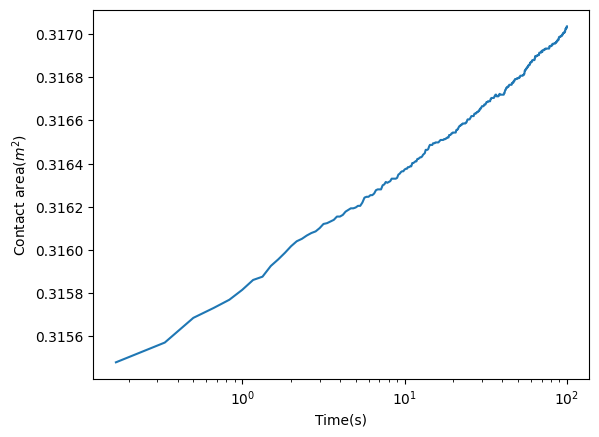

In [44]:
plt.plot(np.arange(t0, t1, dt)+dt, Ac_tamaas)
plt.xlabel("Time(s)")
plt.ylabel("Contact area($m^2$)")
plt.xscale("log")
plt.show()

### Q: The pertubation in the figure above may show that we need a compromise between our number of Maxwell branches and surface discrization?

#### Now we move to nonmonotonic aging

In [45]:


#solver = tm.MaxwellViscoelastic(model, surface, 1e-12, dt, shear_modulus, characteristic_time)
#model.operators['westergaard_neumann']['influence'][:] = 2 / model.E_star

solver.reset()

# Solve for target pressure
p_target1 = 0.1#avarge pressure
p_target2 = 0.075#avarge pressure

tm.Statistics2D.contact(model.traction)
model.traction[:] = 0
model.displacement[:] = 0

# Solve for target pressure
contact_area = []
for i in range(time_steps):
    if i < 300:
        solver.solve(p_target1)
    else:
        solver.solve(p_target2)
    contact_area.append(tm.Statistics2D.contact(model.traction))
    print(np.mean(model.traction))

np.save("contact_area.npy", contact_area)

 Iter          Cost_f           Error
    0   -4.333261e-02    2.287595e+00
    7   -4.586506e-02    1.734180e-15
 Iter          Cost_f           Error
    0   -3.922213e-02    1.027862e-03
    2   -4.583957e-02    1.292489e-15
 Iter          Cost_f           Error
    0   -3.920837e-02    7.089196e-04
    2   -4.582200e-02    2.692338e-15
 Iter          Cost_f           Error
    0   -3.919795e-02    5.279791e-04
    2   -4.580892e-02    2.272069e-15
 Iter          Cost_f           Error
    0   -3.918961e-02    4.170351e-04
    2   -4.579859e-02    1.229833e-15
 Iter          Cost_f           Error
    0   -3.918267e-02    3.440014e-04
    2   -4.579007e-02    1.670421e-15


0.10000000000000005
0.10000000000000003
0.10000000000000003
0.10000000000000002
0.09999999999999996


 Iter          Cost_f           Error
    0   -3.917673e-02    2.929100e-04
    2   -4.578281e-02    1.525277e-15
 Iter          Cost_f           Error
    0   -3.917153e-02    2.553435e-04
    2   -4.577649e-02    2.865493e-15
 Iter          Cost_f           Error
    0   -3.916690e-02    2.265983e-04
    2   -4.577088e-02    1.472551e-15
 Iter          Cost_f           Error
    0   -3.916272e-02    2.038924e-04
    2   -4.576583e-02    2.248021e-15
 Iter          Cost_f           Error
    0   -3.915892e-02    1.854936e-04
    2   -4.576123e-02    2.102117e-15


0.10000000000000003
0.10000000000000005
0.09999999999999996
0.09999999999999994
0.1
0.10000000000000003


 Iter          Cost_f           Error
    0   -3.915542e-02    1.702722e-04
    2   -4.575702e-02    1.903279e-15
 Iter          Cost_f           Error
    0   -3.915218e-02    1.574624e-04
    2   -4.575312e-02    1.448743e-15
 Iter          Cost_f           Error
    0   -3.914916e-02    1.465276e-04
    2   -4.574949e-02    2.569769e-15
 Iter          Cost_f           Error
    0   -3.914634e-02    1.370795e-04
    2   -4.574610e-02    1.494336e-15
 Iter          Cost_f           Error
    0   -3.914368e-02    1.288306e-04
    2   -4.574291e-02    2.488625e-15
 Iter          Cost_f           Error
    0   -3.914117e-02    1.215634e-04
    2   -4.573990e-02    1.449769e-15


0.10000000000000003
0.09999999999999998
0.09999999999999998
0.1
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.913879e-02    1.151103e-04
    2   -4.573705e-02    1.978929e-15
 Iter          Cost_f           Error
    0   -3.913653e-02    1.093400e-04
    2   -4.573435e-02    1.445658e-15
 Iter          Cost_f           Error
    0   -3.913438e-02    1.041480e-04
    2   -4.573177e-02    1.298836e-15
 Iter          Cost_f           Error
    0   -3.913232e-02    9.945055e-05
    2   -4.572931e-02    1.484391e-15
 Iter          Cost_f           Error
    0   -3.913036e-02    9.517892e-05


0.1
0.10000000000000006
0.1000000000000001
0.10000000000000002
0.09999999999999994


    2   -4.572695e-02    2.386536e-15
 Iter          Cost_f           Error
    0   -3.912847e-02    9.127756e-05
    2   -4.572470e-02    1.190892e-15
 Iter          Cost_f           Error
    0   -3.912665e-02    8.769910e-05
    2   -4.572253e-02    1.557799e-15
 Iter          Cost_f           Error
    0   -3.912491e-02    8.440471e-05
    2   -4.572044e-02    1.652047e-15
 Iter          Cost_f           Error
    0   -3.912322e-02    8.136114e-05
    2   -4.571842e-02    1.983152e-15
 Iter          Cost_f           Error
    0   -3.912160e-02    7.854061e-05


0.10000000000000003
0.09999999999999998
0.10000000000000005
0.09999999999999998
0.10000000000000003


    2   -4.571648e-02    1.260638e-15
 Iter          Cost_f           Error
    0   -3.912002e-02    7.591919e-05
    2   -4.571460e-02    1.719541e-15
 Iter          Cost_f           Error
    0   -3.911850e-02    7.347602e-05
    2   -4.571278e-02    2.130544e-15
 Iter          Cost_f           Error
    0   -3.911703e-02    7.119321e-05
    2   -4.571102e-02    1.501486e-15
 Iter          Cost_f           Error
    0   -3.911560e-02    6.905541e-05
    2   -4.570932e-02    2.207598e-15
 Iter          Cost_f           Error
    0   -3.911421e-02    6.704891e-05
    1   -4.570766e-02    1.492167e-15


0.10000000000000005
0.09999999999999996
0.09999999999999999
0.09999999999999998
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.911286e-02    6.516189e-05
    2   -4.570604e-02    1.293083e-15
 Iter          Cost_f           Error
    0   -3.911154e-02    6.338351e-05
    2   -4.570448e-02    1.483792e-15
 Iter          Cost_f           Error
    0   -3.911026e-02    6.170527e-05
    2   -4.570295e-02    1.283438e-15
 Iter          Cost_f           Error
    0   -3.910902e-02    6.011824e-05
    1   -4.570146e-02    1.469125e-15
 Iter          Cost_f           Error
    0   -3.910780e-02    5.861483e-05


0.1
0.1
0.09999999999999996
0.10000000000000002
0.1


    2   -4.570001e-02    1.300580e-15
 Iter          Cost_f           Error
    0   -3.910662e-02    5.718896e-05
    2   -4.569860e-02    1.289741e-15
 Iter          Cost_f           Error
    0   -3.910546e-02    5.583456e-05
    2   -4.569722e-02    1.480146e-15
 Iter          Cost_f           Error
    0   -3.910433e-02    5.454635e-05
    2   -4.569587e-02    1.758064e-15
 Iter          Cost_f           Error
    0   -3.910322e-02    5.331932e-05
    2   -4.569455e-02    2.035682e-15
 Iter          Cost_f           Error
    0   -3.910214e-02    5.214931e-05
    1   -4.569326e-02    2.551362e-15


0.09999999999999995
0.10000000000000002
0.10000000000000003
0.10000000000000005
0.10000000000000003


 Iter          Cost_f           Error
    0   -3.910108e-02    5.103237e-05
    1   -4.569200e-02    1.399199e-15
 Iter          Cost_f           Error
    0   -3.910004e-02    4.996489e-05
    2   -4.569076e-02    2.364364e-15
 Iter          Cost_f           Error
    0   -3.909903e-02    4.894359e-05
    2   -4.568955e-02    1.715981e-15
 Iter          Cost_f           Error
    0   -3.909803e-02    4.796551e-05
    2   -4.568837e-02    1.488673e-15
 Iter          Cost_f           Error
    0   -3.909706e-02    4.702788e-05
    2   -4.568720e-02    1.425861e-15
 Iter          Cost_f           Error
    0   -3.909610e-02    4.612828e-05


0.09999999999999999
0.09999999999999996
0.10000000000000002
0.10000000000000005
0.09999999999999998
0.09999999999999998


    2   -4.568606e-02    1.881088e-15
 Iter          Cost_f           Error
    0   -3.909516e-02    4.526433e-05
    2   -4.568494e-02    2.341685e-15
 Iter          Cost_f           Error
    0   -3.909424e-02    4.443394e-05
    2   -4.568384e-02    1.308850e-15
 Iter          Cost_f           Error
    0   -3.909333e-02    4.363496e-05
    1   -4.568277e-02    1.844089e-15
 Iter          Cost_f           Error
    0   -3.909245e-02    4.286621e-05
    1   -4.568171e-02    1.792017e-15
 Iter          Cost_f           Error
    0   -3.909157e-02    4.212540e-05
    1   -4.568066e-02    1.460544e-15
 Iter          Cost_f           Error
    0   -3.909071e-02    4.141119e-05
    2   -4.567964e-02    2.104737e-15


0.09999999999999999
0.10000000000000002
0.09999999999999991
0.10000000000000005
0.10000000000000003
0.1


 Iter          Cost_f           Error
    0   -3.908987e-02    4.072216e-05
    2   -4.567863e-02    2.119623e-15
 Iter          Cost_f           Error
    0   -3.908904e-02    4.005701e-05
    2   -4.567764e-02    1.718102e-15
 Iter          Cost_f           Error
    0   -3.908822e-02    3.941440e-05
    2   -4.567667e-02    1.340391e-15
 Iter          Cost_f           Error
    0   -3.908741e-02    3.879326e-05
    2   -4.567571e-02    1.823167e-15
 Iter          Cost_f           Error
    0   -3.908662e-02    3.819248e-05
    1   -4.567477e-02    1.338252e-15


0.10000000000000005
0.10000000000000002
0.10000000000000007
0.1
0.1
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.908584e-02    3.761118e-05
    2   -4.567384e-02    2.236242e-15
 Iter          Cost_f           Error
    0   -3.908507e-02    3.704826e-05
    2   -4.567292e-02    3.172167e-15
 Iter          Cost_f           Error
    0   -3.908431e-02    3.650286e-05
    1   -4.567202e-02    1.522393e-15
 Iter          Cost_f           Error
    0   -3.908357e-02    3.597423e-05
    2   -4.567113e-02    3.450336e-15
 Iter          Cost_f           Error
    0   -3.908283e-02    3.546157e-05
    1   -4.567025e-02    1.604456e-15
 Iter          Cost_f           Error
    0   -3.908210e-02    3.496417e-05
    2   -4.566939e-02    1.275991e-15
 Iter          Cost_f           Error
    0   -3.908139e-02    3.448127e-05
    1   -4.566853e-02    1.099117e-15


0.10000000000000003
0.10000000000000002
0.10000000000000009
0.09999999999999998
0.1
0.1


 Iter          Cost_f           Error
    0   -3.908068e-02    3.401219e-05
    2   -4.566769e-02    1.321508e-15
 Iter          Cost_f           Error
    0   -3.907999e-02    3.355673e-05
    1   -4.566686e-02    1.373956e-15
 Iter          Cost_f           Error
    0   -3.907930e-02    3.311386e-05
    2   -4.566605e-02    1.541126e-15
 Iter          Cost_f           Error
    0   -3.907862e-02    3.268323e-05
    2   -4.566524e-02    1.661449e-15
 Iter          Cost_f           Error
    0   -3.907795e-02    3.226424e-05
    1   -4.566444e-02    1.290176e-15
 Iter          Cost_f           Error
    0   -3.907729e-02    3.185672e-05
    2   -4.566365e-02    1.193835e-15


0.10000000000000002
0.10000000000000005
0.1
0.10000000000000005
0.10000000000000006
0.09999999999999994


 Iter          Cost_f           Error
    0   -3.907664e-02    3.145960e-05
    1   -4.566287e-02    1.423329e-15
 Iter          Cost_f           Error
    0   -3.907599e-02    3.107296e-05
    2   -4.566211e-02    2.133365e-15
 Iter          Cost_f           Error
    0   -3.907535e-02    3.069636e-05
    2   -4.566135e-02    1.979867e-15
 Iter          Cost_f           Error
    0   -3.907472e-02    3.032913e-05
    1   -4.566060e-02    1.336181e-15
 Iter          Cost_f           Error
    0   -3.907410e-02    2.997121e-05
    2   -4.565986e-02    1.474082e-15
 Iter          Cost_f           Error
    0   -3.907349e-02    2.962212e-05
    2   -4.565913e-02    1.418419e-15


0.10000000000000005
0.10000000000000003
0.09999999999999999
0.09999999999999999
0.09999999999999999
0.1


 Iter          Cost_f           Error
    0   -3.907288e-02    2.928152e-05
    2   -4.565840e-02    1.430399e-15
 Iter          Cost_f           Error
    0   -3.907228e-02    2.894916e-05
    2   -4.565769e-02    2.768153e-15
 Iter          Cost_f           Error
    0   -3.907168e-02    2.862462e-05
    2   -4.565698e-02    1.408146e-15
 Iter          Cost_f           Error
    0   -3.907110e-02    2.830784e-05
    1   -4.565628e-02    1.904512e-15
 Iter          Cost_f           Error
    0   -3.907051e-02    2.799832e-05
    1   -4.565559e-02    1.278017e-15
 Iter          Cost_f           Error
    0   -3.906994e-02    2.769594e-05
    2   -4.565490e-02    2.070094e-15


0.10000000000000005
0.10000000000000006
0.09999999999999996
0.09999999999999996
0.09999999999999994
0.09999999999999995


 Iter          Cost_f           Error
    0   -3.906937e-02    2.740027e-05
    2   -4.565423e-02    1.962683e-15
 Iter          Cost_f           Error
    0   -3.906881e-02    2.711141e-05
    2   -4.565356e-02    1.646516e-15
 Iter          Cost_f           Error
    0   -3.906825e-02    2.682880e-05
    1   -4.565289e-02    1.424767e-15
 Iter          Cost_f           Error
    0   -3.906770e-02    2.655242e-05
    1   -4.565224e-02    1.522640e-15
 Iter          Cost_f           Error
    0   -3.906715e-02    2.628189e-05
    1   -4.565159e-02    1.307069e-15
 Iter          Cost_f           Error
    0   -3.906661e-02    2.601737e-05
    2   -4.565094e-02    1.211979e-15


0.09999999999999995
0.10000000000000007
0.10000000000000003
0.09999999999999998
0.09999999999999999
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.906608e-02    2.575828e-05
    1   -4.565031e-02    2.438255e-15
 Iter          Cost_f           Error
    0   -3.906555e-02    2.550469e-05
    1   -4.564968e-02    1.251190e-15
 Iter          Cost_f           Error
    0   -3.906503e-02    2.525629e-05
    2   -4.564905e-02    1.650271e-15
 Iter          Cost_f           Error
    0   -3.906451e-02    2.501297e-05
    1   -4.564843e-02    1.632984e-15
 Iter          Cost_f           Error
    0   -3.906399e-02    2.477460e-05
    1   -4.564782e-02    1.644507e-15
 Iter          Cost_f           Error
    0   -3.906348e-02    2.454090e-05
    1   -4.564722e-02    1.932576e-15
 Iter          Cost_f           Error
    0   -3.906298e-02    2.431196e-05


0.10000000000000002
0.1
0.10000000000000003
0.10000000000000003
0.09999999999999999
0.09999999999999998
0.1


    1   -4.564661e-02    1.619528e-15
 Iter          Cost_f           Error
    0   -3.906248e-02    2.408788e-05
    2   -4.564602e-02    1.305493e-15
 Iter          Cost_f           Error
    0   -3.906198e-02    2.386735e-05
    2   -4.564543e-02    2.096124e-15
 Iter          Cost_f           Error
    0   -3.906149e-02    2.365140e-05
    2   -4.564484e-02    1.285329e-15
 Iter          Cost_f           Error
    0   -3.906100e-02    2.343940e-05
    1   -4.564427e-02    1.481756e-15
 Iter          Cost_f           Error
    0   -3.906052e-02    2.323175e-05
    1   -4.564369e-02    1.721026e-15
 Iter          Cost_f           Error
    0   -3.906004e-02    2.302780e-05
    1   -4.564312e-02    1.286628e-15


0.10000000000000002
0.1
0.09999999999999995
0.10000000000000003
0.09999999999999998
0.10000000000000003


 Iter          Cost_f           Error
    0   -3.905957e-02    2.282727e-05
    1   -4.564256e-02    1.188844e-15
 Iter          Cost_f           Error
    0   -3.905910e-02    2.263100e-05
    2   -4.564200e-02    1.832518e-15
 Iter          Cost_f           Error
    0   -3.905863e-02    2.243810e-05
    1   -4.564144e-02    1.447810e-15
 Iter          Cost_f           Error
    0   -3.905817e-02    2.224858e-05
    1   -4.564090e-02    1.429278e-15
 Iter          Cost_f           Error
    0   -3.905771e-02    2.206244e-05
    2   -4.564035e-02    1.185782e-15
 Iter          Cost_f           Error
    0   -3.905726e-02    2.187957e-05
    1   -4.563981e-02    1.943884e-15


0.10000000000000002
0.1
0.10000000000000005
0.10000000000000005
0.09999999999999994
0.10000000000000003
0.09999999999999995


 Iter          Cost_f           Error
    0   -3.905681e-02    2.169989e-05
    2   -4.563927e-02    1.511964e-15
 Iter          Cost_f           Error
    0   -3.905636e-02    2.152332e-05
    1   -4.563874e-02    1.291776e-15
 Iter          Cost_f           Error
    0   -3.905592e-02    2.134979e-05
    1   -4.563821e-02    1.314579e-15
 Iter          Cost_f           Error
    0   -3.905548e-02    2.117914e-05
    2   -4.563769e-02    1.619011e-15
 Iter          Cost_f           Error
    0   -3.905504e-02    2.101142e-05
    1   -4.563717e-02    1.597738e-15
 Iter          Cost_f           Error
    0   -3.905461e-02    2.084649e-05
    1   -4.563666e-02    1.168568e-15
 Iter          Cost_f           Error
    0   -3.905418e-02    2.068427e-05


0.10000000000000007
0.10000000000000006
0.10000000000000005
0.1
0.09999999999999999
0.09999999999999995


    2   -4.563615e-02    1.984630e-15
 Iter          Cost_f           Error
    0   -3.905375e-02    2.052473e-05
    2   -4.563564e-02    1.700749e-15
 Iter          Cost_f           Error
    0   -3.905333e-02    2.036775e-05
    1   -4.563513e-02    1.445195e-15
 Iter          Cost_f           Error
    0   -3.905291e-02    2.021331e-05
    2   -4.563464e-02    1.702043e-15
 Iter          Cost_f           Error
    0   -3.905250e-02    2.006134e-05
    1   -4.563414e-02    1.252246e-15
 Iter          Cost_f           Error
    0   -3.905208e-02    1.991177e-05
    1   -4.563365e-02    1.658251e-15
 Iter          Cost_f           Error
    0   -3.905167e-02    1.976411e-05
    1   -4.563316e-02    1.236010e-15
 Iter          Cost_f           Error
    0   -3.905126e-02    1.961964e-05


0.10000000000000005
0.09999999999999996
0.09999999999999998
0.1
0.09999999999999996
0.1
0.09999999999999998


    1   -4.563267e-02    1.838171e-15
 Iter          Cost_f           Error
    0   -3.905086e-02    1.947696e-05
    1   -4.563219e-02    1.497168e-15
 Iter          Cost_f           Error
    0   -3.905046e-02    1.933601e-05
    2   -4.563172e-02    1.972126e-15
 Iter          Cost_f           Error
    0   -3.905006e-02    1.919810e-05
    1   -4.563124e-02    2.396985e-15
 Iter          Cost_f           Error
    0   -3.904966e-02    1.906182e-05
    2   -4.563077e-02    1.285570e-15
 Iter          Cost_f           Error
    0   -3.904927e-02    1.892759e-05
    1   -4.563030e-02    1.408919e-15
 Iter          Cost_f           Error
    0   -3.904888e-02    1.879536e-05
    2   -4.562984e-02    1.547408e-15


0.10000000000000002
0.10000000000000006
0.1
0.09999999999999999
0.09999999999999999
0.1


 Iter          Cost_f           Error
    0   -3.904849e-02    1.866499e-05
    2   -4.562938e-02    1.490420e-15
 Iter          Cost_f           Error
    0   -3.904811e-02    1.853666e-05
    2   -4.562892e-02    1.520327e-15
 Iter          Cost_f           Error
    0   -3.904773e-02    1.841011e-05
    1   -4.562846e-02    2.410561e-15
 Iter          Cost_f           Error
    0   -3.904735e-02    1.828542e-05
    2   -4.562801e-02    1.866824e-15
 Iter          Cost_f           Error
    0   -3.904697e-02    1.816251e-05
    1   -4.562756e-02    2.023387e-15
 Iter          Cost_f           Error
    0   -3.904659e-02    1.804113e-05


0.09999999999999995
0.10000000000000005
0.10000000000000002
0.10000000000000005
0.1
0.09999999999999996


    2   -4.562712e-02    1.486503e-15
 Iter          Cost_f           Error
    0   -3.904622e-02    1.792187e-05
    1   -4.562668e-02    2.267680e-15
 Iter          Cost_f           Error
    0   -3.904585e-02    1.780413e-05
    2   -4.562624e-02    1.436458e-15
 Iter          Cost_f           Error
    0   -3.904549e-02    1.768787e-05
    1   -4.562580e-02    1.990794e-15
 Iter          Cost_f           Error
    0   -3.904512e-02    1.757309e-05
    1   -4.562537e-02    2.011575e-15
 Iter          Cost_f           Error
    0   -3.904476e-02    1.746028e-05
    1   -4.562493e-02    1.480703e-15
 Iter          Cost_f           Error
    0   -3.904440e-02    1.734880e-05
    1   -4.562451e-02    1.714243e-15
 Iter          Cost_f           Error
    0   -3.904404e-02    1.723883e-05


0.09999999999999998
0.10000000000000006
0.10000000000000002
0.10000000000000002
0.10000000000000006
0.1
0.10000000000000006


    1   -4.562408e-02    1.884447e-15
 Iter          Cost_f           Error
    0   -3.904368e-02    1.713033e-05
    2   -4.562366e-02    1.720816e-15
 Iter          Cost_f           Error
    0   -3.904333e-02    1.702327e-05
    1   -4.562324e-02    1.347186e-15
 Iter          Cost_f           Error
    0   -3.904298e-02    1.691758e-05
    1   -4.562282e-02    1.261763e-13
 Iter          Cost_f           Error
    0   -3.904263e-02    1.681336e-05
    2   -4.562240e-02    1.230520e-15
 Iter          Cost_f           Error
    0   -3.904228e-02    1.671044e-05
    2   -4.562199e-02    1.774440e-15
 Iter          Cost_f           Error
    0   -3.904194e-02    1.660880e-05
    1   -4.562158e-02    1.495292e-15
 Iter          Cost_f           Error


0.10000000000000002
0.10000000000000002
0.1
0.10000000000000003
0.09999999999999999
0.10000000000000002
0.10000000000000002


    0   -3.904160e-02    1.650849e-05
    1   -4.562117e-02    1.486065e-15
 Iter          Cost_f           Error
    0   -3.904126e-02    1.640934e-05
    1   -4.562077e-02    1.356312e-15
 Iter          Cost_f           Error
    0   -3.904092e-02    1.631171e-05
    1   -4.562036e-02    1.364490e-15
 Iter          Cost_f           Error
    0   -3.904058e-02    1.621519e-05
    2   -4.561996e-02    1.321182e-15
 Iter          Cost_f           Error
    0   -3.904025e-02    1.611988e-05
    2   -4.561956e-02    1.291431e-15
 Iter          Cost_f           Error
    0   -3.903991e-02    1.602578e-05
    2   -4.561917e-02    1.800394e-15
 Iter          Cost_f           Error
    0   -3.903958e-02    1.593286e-05
    2   -4.561878e-02    1.337725e-15


0.10000000000000002
0.09999999999999999
0.09999999999999998
0.10000000000000003
0.09999999999999999
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.903925e-02    1.584112e-05
    1   -4.561838e-02    1.712244e-15
 Iter          Cost_f           Error
    0   -3.903893e-02    1.574978e-05
    1   -4.561800e-02    1.844425e-15
 Iter          Cost_f           Error
    0   -3.903860e-02    1.566058e-05
    1   -4.561761e-02    1.472520e-15
 Iter          Cost_f           Error
    0   -3.903828e-02    1.557206e-05
    1   -4.561722e-02    1.477943e-15
 Iter          Cost_f           Error
    0   -3.903796e-02    1.548459e-05
    1   -4.561684e-02    1.303787e-15
 Iter          Cost_f           Error
    0   -3.903764e-02    1.539809e-05
    2   -4.561646e-02    1.348897e-15
 Iter          Cost_f           Error
    0   -3.903732e-02    1.531249e-05
    2   -4.561608e-02    1.257417e-15


0.10000000000000009
0.10000000000000006
0.10000000000000009
0.09999999999999999
0.09999999999999996
0.1
0.09999999999999996


 Iter          Cost_f           Error
    0   -3.903700e-02    1.522815e-05
    1   -4.561571e-02    2.959903e-15
 Iter          Cost_f           Error
    0   -3.903669e-02    1.514487e-05
    1   -4.561533e-02    1.128973e-15
 Iter          Cost_f           Error
    0   -3.903638e-02    1.506241e-05
    1   -4.561496e-02    1.841883e-15
 Iter          Cost_f           Error
    0   -3.903606e-02    1.498083e-05
    2   -4.561459e-02    1.644987e-15
 Iter          Cost_f           Error
    0   -3.903576e-02    1.490027e-05
    1   -4.561422e-02    1.296088e-15
 Iter          Cost_f           Error
    0   -3.903545e-02    1.482063e-05
    2   -4.561386e-02    1.507209e-15
 Iter          Cost_f           Error
    0   -3.903514e-02    1.474190e-05
    1   -4.561349e-02    1.842330e-15


0.09999999999999996
0.09999999999999996
0.09999999999999998
0.09999999999999996
0.09999999999999999
0.09999999999999998
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.903484e-02    1.466406e-05
    1   -4.561313e-02    1.276594e-15
 Iter          Cost_f           Error
    0   -3.903453e-02    1.458701e-05
    2   -4.561277e-02    1.335708e-15
 Iter          Cost_f           Error
    0   -3.903423e-02    1.451079e-05
    1   -4.561241e-02    1.209366e-15
 Iter          Cost_f           Error
    0   -3.903393e-02    1.443548e-05
    2   -4.561205e-02    1.386167e-15
 Iter          Cost_f           Error
    0   -3.903364e-02    1.436099e-05
    1   -4.561170e-02    1.921210e-15
 Iter          Cost_f           Error
    0   -3.903334e-02    1.428709e-05
    2   -4.561135e-02    1.656773e-15
 Iter          Cost_f           Error
    0   -3.903304e-02    1.421457e-05
    1   -4.561100e-02    2.226458e-15


0.1
0.10000000000000002
0.09999999999999998
0.09999999999999999
0.09999999999999995
0.09999999999999998
0.10000000000000006


 Iter          Cost_f           Error
    0   -3.903275e-02    1.414235e-05
    1   -4.561065e-02    2.151596e-15
 Iter          Cost_f           Error
    0   -3.903246e-02    1.407102e-05
    2   -4.561030e-02    1.620335e-15
 Iter          Cost_f           Error
    0   -3.903217e-02    1.400039e-05
    2   -4.560995e-02    2.799602e-15
 Iter          Cost_f           Error
    0   -3.903188e-02    1.393065e-05
    2   -4.560961e-02    1.287330e-15
 Iter          Cost_f           Error
    0   -3.903159e-02    1.386157e-05
    1   -4.560927e-02    1.284275e-15
 Iter          Cost_f           Error
    0   -3.903130e-02    1.379331e-05
    1   -4.560893e-02    2.315680e-15
 Iter          Cost_f           Error
    0   -3.903102e-02    1.372560e-05
    1   -4.560859e-02    2.241838e-15


0.10000000000000007
0.10000000000000002
0.1
0.1
0.10000000000000003
0.09999999999999996
0.10000000000000003


 Iter          Cost_f           Error
    0   -3.903074e-02    1.365863e-05
    1   -4.560825e-02    1.488269e-15
 Iter          Cost_f           Error
    0   -3.903045e-02    1.359238e-05
    2   -4.560791e-02    1.235789e-15
 Iter          Cost_f           Error
    0   -3.903017e-02    1.352686e-05
    2   -4.560758e-02    1.289284e-15
 Iter          Cost_f           Error
    0   -3.902989e-02    1.346200e-05
    1   -4.560725e-02    1.816786e-15
 Iter          Cost_f           Error
    0   -3.902961e-02    1.339772e-05
    1   -4.560692e-02    1.445910e-15
 Iter          Cost_f           Error
    0   -3.902934e-02    1.333415e-05
    1   -4.560659e-02    1.554923e-15
 Iter          Cost_f           Error
    0   -3.902906e-02    1.327119e-05
    2   -4.560626e-02    2.549155e-15


0.09999999999999999
0.09999999999999998
0.09999999999999996
0.09999999999999999
0.10000000000000003
0.1
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.902879e-02    1.320887e-05
    2   -4.560593e-02    2.269525e-15
 Iter          Cost_f           Error
    0   -3.902852e-02    1.314714e-05
    2   -4.560561e-02    1.309327e-15
 Iter          Cost_f           Error
    0   -3.902824e-02    1.308609e-05
    1   -4.560529e-02    1.932106e-15
 Iter          Cost_f           Error
    0   -3.902797e-02    1.302561e-05
    1   -4.560496e-02    1.899980e-15
 Iter          Cost_f           Error
    0   -3.902770e-02    1.296563e-05
    1   -4.560464e-02    1.262703e-15
 Iter          Cost_f           Error
    0   -3.902744e-02    1.290591e-05
    2   -4.560433e-02    1.669849e-15
 Iter          Cost_f           Error
    0   -3.902717e-02    1.284773e-05
    1   -4.560401e-02    1.299064e-15


0.09999999999999995
0.09999999999999998
0.1
0.10000000000000003
0.09999999999999999
0.10000000000000005
0.09999999999999995


 Iter          Cost_f           Error
    0   -3.902690e-02    1.278939e-05
    1   -4.560369e-02    2.223607e-15
 Iter          Cost_f           Error
    0   -3.902664e-02    1.273186e-05
    1   -4.560338e-02    1.447441e-15
 Iter          Cost_f           Error
    0   -3.902638e-02    1.267494e-05
    1   -4.560307e-02    1.260611e-15
 Iter          Cost_f           Error
    0   -3.902611e-02    1.261827e-05
    1   -4.560275e-02    2.015504e-15
 Iter          Cost_f           Error
    0   -3.902585e-02    1.256222e-05
    1   -4.560244e-02    1.341784e-15
 Iter          Cost_f           Error
    0   -3.902559e-02    1.250628e-05
    2   -4.560213e-02    1.282725e-15
 Iter          Cost_f           Error
    0   -3.902534e-02    1.245168e-05
    2   -4.560183e-02    1.559140e-15


0.1
0.1
0.09999999999999998
0.09999999999999998
0.09999999999999999
0.10000000000000002
0.09999999999999999


 Iter          Cost_f           Error
    0   -3.902508e-02    1.239743e-05
    1   -4.560152e-02    2.003812e-15
 Iter          Cost_f           Error
    0   -3.902482e-02    1.234350e-05
    2   -4.560122e-02    1.962335e-15
 Iter          Cost_f           Error
    0   -3.902457e-02    1.229008e-05
    1   -4.560091e-02    2.026195e-15
 Iter          Cost_f           Error
    0   -3.902431e-02    1.223714e-05
    1   -4.560061e-02    1.396098e-15
 Iter          Cost_f           Error
    0   -3.902406e-02    1.218465e-05
    1   -4.560031e-02    1.443370e-15
 Iter          Cost_f           Error
    0   -3.902381e-02    1.213269e-05
    1   -4.560001e-02    1.486358e-15
 Iter          Cost_f           Error
    0   -3.902356e-02    1.208117e-05
    1   -4.559971e-02    2.086884e-15


0.10000000000000002
0.09999999999999999
0.09999999999999996
0.1
0.10000000000000003
0.10000000000000009
0.1


 Iter          Cost_f           Error
    0   -3.902331e-02    1.203012e-05
    1   -4.559941e-02    1.274606e-15
 Iter          Cost_f           Error
    0   -3.902306e-02    1.197948e-05
    1   -4.559912e-02    1.627941e-15
 Iter          Cost_f           Error
    0   -3.902281e-02    1.192929e-05
    2   -4.559882e-02    1.640770e-15
 Iter          Cost_f           Error
    0   -3.902256e-02    1.187971e-05
    2   -4.559853e-02    1.270678e-15
 Iter          Cost_f           Error
    0   -3.902232e-02    1.183011e-05
    1   -4.559824e-02    1.509598e-15
 Iter          Cost_f           Error
    0   -3.902207e-02    1.178156e-05
    2   -4.559795e-02    1.505463e-15


0.1
0.10000000000000005
0.10000000000000007
0.09999999999999998
0.10000000000000005
0.09999999999999994


 Iter          Cost_f           Error
    0   -3.902183e-02    1.173320e-05
    2   -4.559766e-02    2.100498e-15
 Iter          Cost_f           Error
    0   -3.902159e-02    1.168521e-05
    1   -4.559737e-02    1.785521e-15
 Iter          Cost_f           Error
    0   -3.902135e-02    1.163766e-05
    1   -4.559708e-02    1.069479e-15
 Iter          Cost_f           Error
    0   -3.902111e-02    1.159033e-05
    2   -4.559680e-02    1.534551e-15
 Iter          Cost_f           Error
    0   -3.902087e-02    1.154373e-05
    2   -4.559651e-02    1.518711e-15
 Iter          Cost_f           Error
    0   -3.902063e-02    1.149741e-05
    1   -4.559623e-02    1.235365e-15
 Iter          Cost_f           Error
    0   -3.902039e-02    1.145146e-05
    1   -4.559594e-02    1.463908e-15


0.1
0.10000000000000002
0.10000000000000002
0.1
0.10000000000000006
0.09999999999999998
0.10000000000000003


 Iter          Cost_f           Error
    0   -3.902015e-02    1.140589e-05
    1   -4.559566e-02    1.761165e-15
 Iter          Cost_f           Error
    0   -3.901992e-02    1.136072e-05
    1   -4.559538e-02    1.523245e-15
 Iter          Cost_f           Error
    0   -3.901968e-02    1.131600e-05
    1   -4.559510e-02    1.686636e-15
 Iter          Cost_f           Error
    0   -3.901945e-02    1.127143e-05
    2   -4.559482e-02    1.399626e-15
 Iter          Cost_f           Error
    0   -3.901922e-02    1.122735e-05
    1   -4.559455e-02    1.459846e-15
 Iter          Cost_f           Error
    0   -3.901898e-02    1.118384e-05
    2   -4.559427e-02    1.750957e-15
 Iter          Cost_f           Error
    0   -3.901875e-02    1.114038e-05
    2   -4.559400e-02    1.123934e-15


0.10000000000000003
0.09999999999999999
0.09999999999999996
0.1
0.09999999999999996
0.1
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.901852e-02    1.109743e-05
    2   -4.559372e-02    1.769009e-15
 Iter          Cost_f           Error
    0   -3.901829e-02    1.105481e-05
    1   -4.559345e-02    1.392828e-15
 Iter          Cost_f           Error
    0   -3.901806e-02    1.101264e-05
    1   -4.559318e-02    1.305878e-15
 Iter          Cost_f           Error
    0   -3.901784e-02    1.097061e-05
    1   -4.559291e-02    1.526794e-15
 Iter          Cost_f           Error
    0   -3.901761e-02    1.092901e-05
    1   -4.559264e-02    1.386079e-15
 Iter          Cost_f           Error
    0   -3.901738e-02    1.088776e-05
    1   -4.559237e-02    1.604174e-15
 Iter          Cost_f           Error
    0   -3.901716e-02    1.084681e-05


0.09999999999999998
0.10000000000000002
0.09999999999999996
0.09999999999999995
0.09999999999999995
0.09999999999999999
0.09999999999999996


    1   -4.559210e-02    1.993172e-15
 Iter          Cost_f           Error
    0   -3.901693e-02    1.080620e-05
    1   -4.559183e-02    1.473867e-15
 Iter          Cost_f           Error
    0   -3.901671e-02    1.076598e-05
    1   -4.559157e-02    1.867568e-15
 Iter          Cost_f           Error
    0   -3.901649e-02    1.072597e-05
    1   -4.559130e-02    1.498571e-15
 Iter          Cost_f           Error
    0   -3.901627e-02    1.068633e-05
    1   -4.559104e-02    1.329187e-15
 Iter          Cost_f           Error
    0   -3.901604e-02    1.064698e-05
    1   -4.559078e-02    2.190318e-15
 Iter          Cost_f           Error
    0   -3.901582e-02    1.060795e-05
    1   -4.559051e-02    1.579533e-15


0.09999999999999995
0.10000000000000005
0.1
0.10000000000000006
0.10000000000000007
0.09999999999999996


 Iter          Cost_f           Error
    0   -3.901561e-02    1.056924e-05
    1   -4.559025e-02    1.798624e-15
 Iter          Cost_f           Error
    0   -3.901539e-02    1.053080e-05
    2   -4.558999e-02    1.347874e-15
 Iter          Cost_f           Error
    0   -3.901517e-02    1.049267e-05
    2   -4.558973e-02    1.399903e-15
 Iter          Cost_f           Error
    0   -3.901495e-02    1.045486e-05
    1   -4.558948e-02    1.764422e-15
 Iter          Cost_f           Error
    0   -3.901474e-02    1.041719e-05
    2   -4.558922e-02    1.190183e-15
 Iter          Cost_f           Error
    0   -3.901452e-02    1.038002e-05
    2   -4.558896e-02    1.630301e-15


0.1
0.10000000000000002
0.10000000000000002
0.10000000000000002
0.10000000000000003
0.09999999999999996


 Iter          Cost_f           Error
    0   -3.901431e-02    1.034296e-05
    2   -4.558871e-02    1.458916e-15
 Iter          Cost_f           Error
    0   -3.901409e-02    1.030623e-05
    1   -4.558845e-02    1.329152e-15
 Iter          Cost_f           Error
    0   -3.901388e-02    1.026993e-05
    2   -4.558820e-02    1.551192e-15
 Iter          Cost_f           Error
    0   -3.901367e-02    1.023379e-05
    2   -4.558795e-02    1.428298e-15
 Iter          Cost_f           Error
    0   -3.901345e-02    1.019789e-05
    1   -4.558769e-02    2.002839e-15
 Iter          Cost_f           Error
    0   -3.901324e-02    1.016239e-05
    2   -4.558744e-02    1.700114e-15


0.10000000000000002
0.09999999999999998
0.09999999999999994
0.09999999999999999
0.09999999999999996
0.10000000000000003


 Iter          Cost_f           Error
    0   -3.901303e-02    1.012710e-05
    1   -4.558719e-02    1.209416e-15
 Iter          Cost_f           Error
    0   -3.901282e-02    1.009147e-05
    1   -4.558694e-02    1.624329e-15
 Iter          Cost_f           Error
    0   -3.901261e-02    1.005743e-05
    1   -4.558670e-02    1.329885e-15
 Iter          Cost_f           Error
    0   -3.901241e-02    1.002246e-05
    2   -4.558645e-02    1.312623e-15
 Iter          Cost_f           Error
    0   -3.901220e-02    9.988493e-06
    1   -4.558620e-02    2.558105e-15
 Iter          Cost_f           Error
    0   -3.901199e-02    9.954071e-06
    1   -4.558596e-02    1.554440e-15


0.09999999999999999
0.09999999999999998
0.1
0.09999999999999996
0.10000000000000006
0.10000000000000002


 Iter          Cost_f           Error
    0   -3.901179e-02    9.920230e-06
    1   -4.558571e-02    1.525537e-15
 Iter          Cost_f           Error
    0   -3.901158e-02    9.886646e-06
    1   -4.558547e-02    4.704009e-13
 Iter          Cost_f           Error
    0   -3.901138e-02    9.853289e-06
    2   -4.558522e-02    2.185636e-15
 Iter          Cost_f           Error
    0   -3.901117e-02    9.820213e-06
    1   -4.558498e-02    1.732584e-15
 Iter          Cost_f           Error
    0   -3.901097e-02    9.787324e-06
    1   -4.558474e-02    1.300055e-15
 Iter          Cost_f           Error
    0   -3.901077e-02    9.754661e-06
    1   -4.558450e-02    1.599802e-15


0.10000000000000006
0.1
0.09999999999999996
0.09999999999999991
0.10000000000000007
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.901057e-02    9.722283e-06
    1   -4.558426e-02    1.810980e-15
 Iter          Cost_f           Error
    0   -3.901036e-02    9.690109e-06
    1   -4.558402e-02    1.476044e-15
 Iter          Cost_f           Error
    0   -3.901016e-02    9.658146e-06
    1   -4.558378e-02    1.509937e-15
 Iter          Cost_f           Error
    0   -3.900996e-02    9.626437e-06
    1   -4.558354e-02    1.434651e-15
 Iter          Cost_f           Error
    0   -3.900977e-02    9.594929e-06
    1   -4.558331e-02    1.546849e-15
 Iter          Cost_f           Error
    0   -3.900957e-02    9.563737e-06
    1   -4.558307e-02    1.565544e-15


0.09999999999999998
0.10000000000000002
0.09999999999999999
0.1
0.10000000000000003
0.1


 Iter          Cost_f           Error
    0   -3.900937e-02    9.532585e-06
    2   -4.558284e-02    1.487700e-15
 Iter          Cost_f           Error
    0   -3.900917e-02    9.501726e-06
    1   -4.558260e-02    1.742070e-15
 Iter          Cost_f           Error
    0   -3.900898e-02    9.471086e-06
    1   -4.558237e-02    1.292556e-15
 Iter          Cost_f           Error
    0   -3.900878e-02    9.440655e-06
    1   -4.558213e-02    1.401496e-15
 Iter          Cost_f           Error
    0   -3.900858e-02    9.410734e-06
    2   -4.558190e-02    1.906176e-15
 Iter          Cost_f           Error
    0   -3.900839e-02    9.380225e-06
    1   -4.558167e-02    2.626636e-15


0.10000000000000006
0.1
0.09999999999999998
0.09999999999999998
0.10000000000000006
0.10000000000000006


 Iter          Cost_f           Error
    0   -3.900820e-02    9.350595e-06
    1   -4.558144e-02    1.703197e-15
 Iter          Cost_f           Error
    0   -3.900800e-02    9.320873e-06
    1   -4.558121e-02    1.652547e-15
 Iter          Cost_f           Error
    0   -3.900781e-02    9.291411e-06
    2   -4.558098e-02    2.285244e-15
 Iter          Cost_f           Error
    0   -3.900762e-02    9.262347e-06
    1   -4.558075e-02    1.895035e-15
 Iter          Cost_f           Error
    0   -3.900743e-02    9.233278e-06
    1   -4.558052e-02    1.662592e-15
 Iter          Cost_f           Error
    0   -3.900723e-02    9.204526e-06
    1   -4.558030e-02    1.474348e-15


0.10000000000000002
0.09999999999999998
0.10000000000000003
0.09999999999999998
0.09999999999999995
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.900704e-02    9.175748e-06
    2   -4.558007e-02    1.291304e-15
 Iter          Cost_f           Error
    0   -3.900685e-02    9.147388e-06
    2   -4.557984e-02    1.208943e-15
 Iter          Cost_f           Error
    0   -3.900666e-02    9.119130e-06
    1   -4.557962e-02    1.634063e-15
 Iter          Cost_f           Error
    0   -3.900648e-02    9.091126e-06
    1   -4.557939e-02    1.979092e-15
 Iter          Cost_f           Error
    0   -3.900629e-02    9.063253e-06
    1   -4.557917e-02    2.044677e-15
 Iter          Cost_f           Error
    0   -3.900610e-02    9.035529e-06
    1   -4.557895e-02    2.120502e-15


0.10000000000000005
0.10000000000000005
0.1
0.10000000000000002
0.10000000000000003
0.10000000000000005


 Iter          Cost_f           Error
    0   -3.900591e-02    9.007932e-06
    1   -4.557872e-02    1.302470e-15
 Iter          Cost_f           Error
    0   -3.900573e-02    8.981223e-06
    1   -4.557850e-02    1.580610e-15
 Iter          Cost_f           Error
    0   -3.900554e-02    8.953404e-06
    1   -4.557828e-02    1.301248e-15
 Iter          Cost_f           Error
    0   -3.900536e-02    8.926404e-06
    2   -4.557806e-02    1.505063e-15
 Iter          Cost_f           Error
    0   -3.900517e-02    8.899569e-06
    1   -4.557784e-02    1.365056e-15
 Iter          Cost_f           Error
    0   -3.900499e-02    8.872916e-06
    1   -4.557762e-02    1.481199e-15


0.09999999999999999
0.1
0.10000000000000005
0.10000000000000002
0.09999999999999996
0.09999999999999998


 Iter          Cost_f           Error
    0   -3.900480e-02    8.846423e-06
    1   -4.557740e-02    1.869896e-15
 Iter          Cost_f           Error
    0   -3.900462e-02    8.820303e-06
    1   -4.557719e-02    3.072816e-15
 Iter          Cost_f           Error
    0   -3.237602e-02    4.460542e-01
    5   -3.796087e-02    1.920652e-15
 Iter          Cost_f           Error
    0   -3.139896e-02    6.644112e-05
    2   -3.796350e-02    1.925127e-13
 Iter          Cost_f           Error
    0   -3.140021e-02    4.440336e-05
    2   -3.796526e-02    5.922338e-15


0.09999999999999998
0.10000000000000002
0.10000000000000006
0.075
0.075


 Iter          Cost_f           Error
    0   -3.140111e-02    3.191905e-05
    2   -3.796652e-02    2.871918e-13
 Iter          Cost_f           Error
    0   -3.140179e-02    2.429002e-05
    2   -3.796748e-02    1.010337e-14
 Iter          Cost_f           Error
    0   -3.140234e-02    1.929736e-05
    2   -3.796825e-02    1.882103e-14
 Iter          Cost_f           Error
    0   -3.140278e-02    1.581034e-05
    1   -3.796887e-02    3.575303e-15
 Iter          Cost_f           Error
    0   -3.140315e-02    1.325128e-05
    1   -3.796939e-02    1.377400e-15
 Iter          Cost_f           Error
    0   -3.140346e-02    1.130401e-05
    2   -3.796983e-02    5.391987e-14


0.075
0.07499999999999998
0.07499999999999998
0.07499999999999998
0.07500000000000002
0.075


 Iter          Cost_f           Error
    0   -3.140373e-02    9.771153e-06
    1   -3.797022e-02    1.834183e-15
 Iter          Cost_f           Error
    0   -3.140396e-02    8.531577e-06
    2   -3.797055e-02    3.629908e-15
 Iter          Cost_f           Error
    0   -3.140416e-02    7.533077e-06
    2   -3.797084e-02    9.961579e-15
 Iter          Cost_f           Error
    0   -3.140434e-02    6.757137e-06
    2   -3.797109e-02    1.106583e-15
 Iter          Cost_f           Error
    0   -3.140449e-02    6.106531e-06
    1   -3.797132e-02    1.889280e-15
 Iter          Cost_f           Error
    0   -3.140463e-02    5.918452e-06
    1   -3.797152e-02    2.164948e-15


0.07499999999999998
0.075
0.07499999999999998
0.07499999999999996
0.075
0.07500000000000002


 Iter          Cost_f           Error
    0   -3.140474e-02    5.792631e-06
    1   -3.797170e-02    1.525108e-15
 Iter          Cost_f           Error
    0   -3.140485e-02    5.681293e-06
    1   -3.797186e-02    1.062621e-15
 Iter          Cost_f           Error
    0   -3.140494e-02    5.580932e-06
    2   -3.797200e-02    2.818827e-15
 Iter          Cost_f           Error
    0   -3.140502e-02    5.490495e-06
    1   -3.797213e-02    1.438263e-15
 Iter          Cost_f           Error
    0   -3.140509e-02    5.407809e-06
    1   -3.797224e-02    1.179707e-15
 Iter          Cost_f           Error
    0   -3.140515e-02    5.331843e-06
    1   -3.797235e-02    1.503041e-15


0.07500000000000002
0.075
0.07499999999999997
0.07500000000000002
0.075
0.07499999999999998


 Iter          Cost_f           Error
    0   -3.140521e-02    5.262128e-06
    1   -3.797244e-02    1.578233e-15
 Iter          Cost_f           Error
    0   -3.140525e-02    5.197384e-06
    1   -3.797252e-02    2.001992e-15
 Iter          Cost_f           Error
    0   -3.140529e-02    5.137148e-06
    1   -3.797259e-02    1.600654e-15
 Iter          Cost_f           Error
    0   -3.140532e-02    5.080857e-06
    1   -3.797265e-02    1.171616e-15
 Iter          Cost_f           Error
    0   -3.140535e-02    5.028231e-06
    1   -3.797270e-02    1.178918e-15
 Iter          Cost_f           Error
    0   -3.140537e-02    4.978511e-06
    1   -3.797275e-02    3.365720e-15


0.07500000000000001
0.075
0.07499999999999991
0.07499999999999996
0.07499999999999998
0.07499999999999993
0.07499999999999998


 Iter          Cost_f           Error
    0   -3.140539e-02    4.931681e-06
    1   -3.797279e-02    1.707384e-15
 Iter          Cost_f           Error
    0   -3.140540e-02    4.887935e-06
    1   -3.797282e-02    1.989308e-15
 Iter          Cost_f           Error
    0   -3.140540e-02    4.865924e-06
    1   -3.797285e-02    1.505008e-15
 Iter          Cost_f           Error
    0   -3.140541e-02    4.850321e-06
    2   -3.797287e-02    1.856266e-15
 Iter          Cost_f           Error
    0   -3.140541e-02    4.840769e-06
    2   -3.797289e-02    1.056340e-15
 Iter          Cost_f           Error
    0   -3.140540e-02    4.865391e-06
    2   -3.797290e-02    1.417869e-15
 Iter          Cost_f           Error
    0   -3.140540e-02    4.887077e-06
    1   -3.797291e-02    1.174591e-15


0.07499999999999997
0.07499999999999998
0.075
0.07500000000000001
0.07499999999999993
0.07499999999999998


 Iter          Cost_f           Error
    0   -3.140539e-02    4.907102e-06
    1   -3.797291e-02    2.929839e-15
 Iter          Cost_f           Error
    0   -3.140537e-02    4.925019e-06
    2   -3.797291e-02    1.051243e-15
 Iter          Cost_f           Error
    0   -3.140536e-02    4.941343e-06
    1   -3.797291e-02    1.204482e-15
 Iter          Cost_f           Error
    0   -3.140534e-02    4.955988e-06
    1   -3.797290e-02    1.314861e-15
 Iter          Cost_f           Error
    0   -3.140532e-02    4.968894e-06
    1   -3.797289e-02    1.813214e-15
 Iter          Cost_f           Error
    0   -3.140530e-02    4.980996e-06
    1   -3.797288e-02    1.222910e-15


0.07500000000000001
0.07500000000000001
0.075
0.07500000000000001
0.07499999999999996
0.07500000000000001


 Iter          Cost_f           Error
    0   -3.140527e-02    4.991551e-06
    1   -3.797286e-02    1.230574e-15
 Iter          Cost_f           Error
    0   -3.140524e-02    5.001117e-06
    1   -3.797284e-02    1.408550e-15
 Iter          Cost_f           Error
    0   -3.140521e-02    5.009187e-06
    2   -3.797282e-02    2.188203e-15
 Iter          Cost_f           Error
    0   -3.140518e-02    5.019163e-06
    1   -3.797280e-02    1.612140e-15
 Iter          Cost_f           Error
    0   -3.140515e-02    5.028627e-06
    1   -3.797277e-02    1.170107e-15
 Iter          Cost_f           Error
    0   -3.140512e-02    5.037221e-06
    1   -3.797274e-02    1.154380e-15


0.07500000000000001
0.07499999999999997
0.07500000000000001
0.075
0.075
0.07500000000000002


 Iter          Cost_f           Error
    0   -3.140508e-02    5.044861e-06
    1   -3.797271e-02    1.028017e-15
 Iter          Cost_f           Error
    0   -3.140504e-02    5.051584e-06
    1   -3.797268e-02    1.324408e-15
 Iter          Cost_f           Error
    0   -3.140500e-02    5.057463e-06
    1   -3.797264e-02    1.280393e-15
 Iter          Cost_f           Error
    0   -3.140496e-02    5.062626e-06
    2   -3.797261e-02    2.620079e-15
 Iter          Cost_f           Error
    0   -3.140492e-02    5.067053e-06
    1   -3.797257e-02    1.393428e-15
 Iter          Cost_f           Error
    0   -3.140488e-02    5.070676e-06
    1   -3.797253e-02    1.278718e-15
 Iter          Cost_f           Error
    0   -3.140483e-02    5.073980e-06


0.07500000000000004
0.07499999999999998
0.07499999999999997
0.075
0.07500000000000002
0.075
0.07499999999999998


    1   -3.797248e-02    1.958250e-15
 Iter          Cost_f           Error
    0   -3.140479e-02    5.076549e-06
    1   -3.797244e-02    1.215663e-15
 Iter          Cost_f           Error
    0   -3.140474e-02    5.078557e-06
    2   -3.797240e-02    2.180912e-15
 Iter          Cost_f           Error
    0   -3.140470e-02    5.080018e-06
    1   -3.797235e-02    1.348222e-15
 Iter          Cost_f           Error
    0   -3.140465e-02    5.080848e-06
    1   -3.797230e-02    1.742640e-15
 Iter          Cost_f           Error
    0   -3.140460e-02    5.081489e-06
    1   -3.797225e-02    1.214217e-15
 Iter          Cost_f           Error
    0   -3.140455e-02    5.081636e-06


0.07500000000000002
0.07499999999999998
0.07500000000000001
0.07499999999999998
0.07499999999999997
0.07499999999999997


    1   -3.797220e-02    1.251161e-15
 Iter          Cost_f           Error
    0   -3.140450e-02    5.081082e-06
    2   -3.797215e-02    2.299214e-15
 Iter          Cost_f           Error
    0   -3.140445e-02    5.080576e-06
    1   -3.797210e-02    1.470955e-15
 Iter          Cost_f           Error
    0   -3.140439e-02    5.079355e-06
    1   -3.797204e-02    1.380797e-15
 Iter          Cost_f           Error
    0   -3.140434e-02    5.078023e-06
    1   -3.797199e-02    1.601537e-15
 Iter          Cost_f           Error
    0   -3.140429e-02    5.076316e-06
    2   -3.797193e-02    1.211664e-15
 Iter          Cost_f           Error
    0   -3.140423e-02    5.074201e-06


0.075
0.075
0.07500000000000001
0.075
0.07500000000000002
0.075


    1   -3.797187e-02    1.479793e-15
 Iter          Cost_f           Error
    0   -3.140418e-02    5.071944e-06
    1   -3.797182e-02    3.640034e-15
 Iter          Cost_f           Error
    0   -3.140412e-02    5.069866e-06
    1   -3.797176e-02    1.268498e-15
 Iter          Cost_f           Error
    0   -3.140406e-02    5.067798e-06
    1   -3.797170e-02    1.703728e-15
 Iter          Cost_f           Error
    0   -3.140400e-02    5.065442e-06
    1   -3.797164e-02    1.121735e-15
 Iter          Cost_f           Error
    0   -3.140395e-02    5.062243e-06
    1   -3.797157e-02    1.068622e-15
 Iter          Cost_f           Error
    0   -3.140389e-02    5.059143e-06
    1   -3.797151e-02    1.417083e-15


0.07499999999999994
0.07500000000000002
0.075
0.07500000000000004
0.07500000000000005
0.07500000000000001


 Iter          Cost_f           Error
    0   -3.140383e-02    5.056830e-06
    1   -3.797145e-02    1.724589e-15
 Iter          Cost_f           Error
    0   -3.140377e-02    5.053467e-06
    1   -3.797139e-02    1.181815e-15
 Iter          Cost_f           Error
    0   -3.140371e-02    5.049911e-06
    1   -3.797132e-02    1.231696e-15
 Iter          Cost_f           Error
    0   -3.140365e-02    5.046239e-06
    1   -3.797126e-02    3.275502e-15
 Iter          Cost_f           Error
    0   -3.140359e-02    5.042709e-06
    1   -3.797119e-02    1.459375e-15
 Iter          Cost_f           Error
    0   -3.140353e-02    5.038930e-06
    1   -3.797112e-02    1.398816e-15


0.07500000000000004
0.07499999999999994
0.07499999999999998
0.07500000000000001
0.07500000000000001
0.07499999999999998


 Iter          Cost_f           Error
    0   -3.140346e-02    5.035145e-06
    1   -3.797106e-02    1.205562e-15
 Iter          Cost_f           Error
    0   -3.140340e-02    5.030792e-06
    1   -3.797099e-02    3.263526e-15
 Iter          Cost_f           Error
    0   -3.140334e-02    5.026480e-06
    1   -3.797092e-02    1.807055e-15
 Iter          Cost_f           Error
    0   -3.140328e-02    5.021851e-06
    1   -3.797085e-02    1.302140e-15
 Iter          Cost_f           Error
    0   -3.140321e-02    5.017804e-06
    1   -3.797078e-02    1.048553e-15
 Iter          Cost_f           Error
    0   -3.140315e-02    5.013563e-06
    1   -3.797071e-02    1.453978e-15


0.07500000000000001
0.07500000000000002
0.07499999999999996
0.07499999999999998
0.075
0.07500000000000001


 Iter          Cost_f           Error
    0   -3.140309e-02    5.009172e-06
    1   -3.797064e-02    1.089289e-15
 Iter          Cost_f           Error
    0   -3.140302e-02    5.004343e-06
    1   -3.797057e-02    1.651110e-15
 Iter          Cost_f           Error
    0   -3.140296e-02    4.999461e-06
    1   -3.797050e-02    1.248004e-15
 Iter          Cost_f           Error
    0   -3.140289e-02    4.994631e-06
    1   -3.797043e-02    1.062654e-15
 Iter          Cost_f           Error
    0   -3.140283e-02    4.989455e-06
    1   -3.797036e-02    1.400828e-15
 Iter          Cost_f           Error
    0   -3.140276e-02    4.984108e-06
    1   -3.797028e-02    1.708698e-15


0.07500000000000002
0.07499999999999996
0.07500000000000001
0.07500000000000002
0.07500000000000001
0.07500000000000004
0.07500000000000002


 Iter          Cost_f           Error
    0   -3.140269e-02    4.978828e-06
    2   -3.797021e-02    1.346231e-15
 Iter          Cost_f           Error
    0   -3.140263e-02    4.973534e-06
    1   -3.797014e-02    1.141621e-15
 Iter          Cost_f           Error
    0   -3.140256e-02    4.968182e-06
    1   -3.797006e-02    2.480221e-15
 Iter          Cost_f           Error
    0   -3.140250e-02    4.962449e-06
    1   -3.796999e-02    1.049251e-15
 Iter          Cost_f           Error
    0   -3.140243e-02    4.956970e-06
    1   -3.796992e-02    1.200954e-15
 Iter          Cost_f           Error
    0   -3.140236e-02    4.950975e-06
    1   -3.796984e-02    1.436339e-15
 Iter          Cost_f           Error
    0   -3.140229e-02    4.944991e-06
    1   -3.796977e-02    2.032335e-15
 Iter          Cost_f           Error
    0   -3.140223e-02    4.939213e-06
    1   -3.796969e-02    1.306122e-15


0.07500000000000002
0.07500000000000001
0.07500000000000002
0.07499999999999998
0.07499999999999996
0.07499999999999997
0.07499999999999994


 Iter          Cost_f           Error
    0   -3.140216e-02    4.933188e-06
    1   -3.796961e-02    1.081820e-15
 Iter          Cost_f           Error
    0   -3.140209e-02    4.927154e-06
    1   -3.796954e-02    1.040444e-15
 Iter          Cost_f           Error
    0   -3.140202e-02    4.921060e-06
    1   -3.796946e-02    1.492793e-15
 Iter          Cost_f           Error
    0   -3.140195e-02    4.915049e-06
    2   -3.796939e-02    1.287127e-15
 Iter          Cost_f           Error
    0   -3.140189e-02    4.908600e-06
    1   -3.796931e-02    1.376798e-15
 Iter          Cost_f           Error
    0   -3.140182e-02    4.902204e-06
    1   -3.796923e-02    1.754807e-15
 Iter          Cost_f           Error
    0   -3.140175e-02    4.895249e-06
    1   -3.796916e-02    1.510364e-15


0.07500000000000001
0.07500000000000004
0.07500000000000004
0.07499999999999997
0.075
0.075
0.07499999999999997


 Iter          Cost_f           Error
    0   -3.140168e-02    4.889523e-06
    1   -3.796908e-02    1.933808e-15
 Iter          Cost_f           Error
    0   -3.140161e-02    4.882998e-06
    1   -3.796900e-02    1.181579e-15
 Iter          Cost_f           Error
    0   -3.140154e-02    4.876461e-06
    1   -3.796892e-02    1.326731e-15
 Iter          Cost_f           Error
    0   -3.140147e-02    4.869896e-06
    1   -3.796884e-02    1.623992e-15
 Iter          Cost_f           Error
    0   -3.140140e-02    4.863064e-06
    1   -3.796877e-02    1.180950e-15
 Iter          Cost_f           Error
    0   -3.140133e-02    4.856719e-06
    1   -3.796869e-02    1.423273e-15
 Iter          Cost_f           Error
    0   -3.140126e-02    4.849556e-06
    1   -3.796861e-02    1.647754e-15


0.07499999999999998
0.07500000000000001
0.07499999999999998
0.07500000000000001
0.07500000000000005
0.07500000000000001
0.07500000000000001


 Iter          Cost_f           Error
    0   -3.140119e-02    4.843257e-06
    1   -3.796853e-02    2.096153e-15
 Iter          Cost_f           Error
    0   -3.140112e-02    4.836528e-06
    2   -3.796845e-02    1.218937e-15
 Iter          Cost_f           Error
    0   -3.140105e-02    4.829611e-06
    1   -3.796837e-02    1.330491e-15
 Iter          Cost_f           Error
    0   -3.140098e-02    4.822910e-06
    1   -3.796829e-02    2.341127e-15
 Iter          Cost_f           Error
    0   -3.140091e-02    4.816156e-06
    1   -3.796821e-02    1.173687e-15
 Iter          Cost_f           Error
    0   -3.140084e-02    4.809107e-06
    1   -3.796813e-02    1.137562e-15
 Iter          Cost_f           Error
    0   -3.140077e-02    4.802524e-06
    1   -3.796805e-02    1.255506e-15


0.07500000000000001
0.07499999999999993
0.075
0.07499999999999998
0.07500000000000001
0.075
0.07500000000000001


 Iter          Cost_f           Error
    0   -3.140070e-02    4.795463e-06
    1   -3.796797e-02    1.651932e-15
 Iter          Cost_f           Error
    0   -3.140063e-02    4.788483e-06
    1   -3.796789e-02    1.561610e-15
 Iter          Cost_f           Error
    0   -3.140056e-02    4.781692e-06
    1   -3.796781e-02    1.265299e-15
 Iter          Cost_f           Error
    0   -3.140049e-02    4.775284e-06
    2   -3.796773e-02    1.236089e-15
 Iter          Cost_f           Error
    0   -3.140042e-02    4.768078e-06
    1   -3.796765e-02    1.287714e-15
 Iter          Cost_f           Error
    0   -3.140035e-02    4.761335e-06
    1   -3.796757e-02    1.173856e-15
 Iter          Cost_f           Error
    0   -3.140028e-02    4.754933e-06
    1   -3.796749e-02    1.634342e-15


0.075
0.075
0.075
0.075
0.07500000000000001
0.07500000000000004
0.075


 Iter          Cost_f           Error
    0   -3.140021e-02    4.748165e-06
    1   -3.796741e-02    1.659891e-15
 Iter          Cost_f           Error
    0   -3.140014e-02    4.741429e-06
    2   -3.796733e-02    1.278022e-15
 Iter          Cost_f           Error
    0   -3.140007e-02    4.733865e-06
    1   -3.796725e-02    1.280390e-15
 Iter          Cost_f           Error
    0   -3.140000e-02    4.727764e-06
    1   -3.796717e-02    1.092183e-15
 Iter          Cost_f           Error
    0   -3.139993e-02    4.720578e-06
    1   -3.796709e-02    9.512303e-16
 Iter          Cost_f           Error
    0   -3.139985e-02    4.714229e-06
    1   -3.796701e-02    1.031911e-15
 Iter          Cost_f           Error
    0   -3.139978e-02    4.707277e-06
    1   -3.796692e-02    2.826303e-15


0.075
0.07500000000000002
0.07500000000000004
0.07500000000000001
0.07499999999999997
0.07499999999999998
0.07500000000000005


 Iter          Cost_f           Error
    0   -3.139971e-02    4.700275e-06
    1   -3.796684e-02    1.031525e-15
 Iter          Cost_f           Error
    0   -3.139964e-02    4.693063e-06
    1   -3.796676e-02    1.398158e-15
 Iter          Cost_f           Error
    0   -3.139957e-02    4.686649e-06
    1   -3.796668e-02    1.817495e-15
 Iter          Cost_f           Error
    0   -3.139950e-02    4.680104e-06
    1   -3.796660e-02    2.011095e-15
 Iter          Cost_f           Error
    0   -3.139943e-02    4.672864e-06
    1   -3.796652e-02    2.004811e-15
 Iter          Cost_f           Error
    0   -3.139936e-02    4.665953e-06
    1   -3.796644e-02    2.462631e-15
 Iter          Cost_f           Error
    0   -3.139928e-02    4.659064e-06
    2   -3.796635e-02    1.077684e-15


0.07500000000000001
0.07500000000000001
0.075
0.07500000000000002
0.07499999999999994
0.07499999999999996
0.07499999999999997


 Iter          Cost_f           Error
    0   -3.139921e-02    4.652739e-06
    1   -3.796627e-02    1.651950e-15
 Iter          Cost_f           Error
    0   -3.139914e-02    4.645104e-06
    1   -3.796619e-02    2.045693e-15
 Iter          Cost_f           Error
    0   -3.139907e-02    4.638314e-06
    1   -3.796611e-02    1.260872e-15
 Iter          Cost_f           Error
    0   -3.139900e-02    4.631449e-06
    1   -3.796603e-02    2.145915e-15
 Iter          Cost_f           Error
    0   -3.139893e-02    4.624305e-06
    2   -3.796595e-02    1.979595e-15
 Iter          Cost_f           Error
    0   -3.139886e-02    4.617527e-06
    1   -3.796586e-02    1.368796e-15
 Iter          Cost_f           Error
    0   -3.139879e-02    4.610385e-06


0.07500000000000001
0.07499999999999996
0.07499999999999997
0.07499999999999998
0.075
0.07499999999999997
0.07500000000000002


    2   -3.796578e-02    1.165220e-15
 Iter          Cost_f           Error
    0   -3.139871e-02    4.603562e-06
    1   -3.796570e-02    1.034581e-15
 Iter          Cost_f           Error
    0   -3.139864e-02    4.596726e-06
    1   -3.796562e-02    1.899946e-15
 Iter          Cost_f           Error
    0   -3.139857e-02    4.589797e-06
    1   -3.796554e-02    1.267664e-15
 Iter          Cost_f           Error
    0   -3.139850e-02    4.582641e-06
    1   -3.796545e-02    1.188435e-15
 Iter          Cost_f           Error
    0   -3.139843e-02    4.575942e-06
    2   -3.796537e-02    1.236190e-15
 Iter          Cost_f           Error
    0   -3.139836e-02    4.569203e-06
    1   -3.796529e-02    1.357081e-15
 Iter          Cost_f           Error
    0   -3.139829e-02    4.562090e-06


0.07499999999999997
0.07500000000000002
0.07499999999999997
0.07500000000000002
0.07500000000000001
0.075
0.075


    2   -3.796521e-02    1.295003e-15
 Iter          Cost_f           Error
    0   -3.139822e-02    4.555169e-06
    1   -3.796512e-02    1.428862e-15
 Iter          Cost_f           Error
    0   -3.139814e-02    4.547964e-06
    1   -3.796504e-02    1.133353e-15
 Iter          Cost_f           Error
    0   -3.139807e-02    4.541421e-06
    1   -3.796496e-02    1.005437e-15
 Iter          Cost_f           Error
    0   -3.139800e-02    4.534550e-06
    2   -3.796488e-02    1.684094e-15
 Iter          Cost_f           Error
    0   -3.139793e-02    4.527528e-06
    2   -3.796480e-02    1.609290e-15
 Iter          Cost_f           Error
    0   -3.139786e-02    4.520637e-06
    2   -3.796471e-02    1.406366e-15
 Iter          Cost_f           Error
    0   -3.139779e-02    4.513745e-06


0.075
0.07500000000000001
0.07499999999999997
0.07499999999999996
0.07500000000000001
0.07500000000000001
0.07500000000000002


    2   -3.796463e-02    1.406379e-15
 Iter          Cost_f           Error
    0   -3.139772e-02    4.506862e-06
    2   -3.796455e-02    1.286752e-15
 Iter          Cost_f           Error
    0   -3.139765e-02    4.499254e-06
    1   -3.796447e-02    1.331565e-15
 Iter          Cost_f           Error
    0   -3.139757e-02    4.493142e-06
    1   -3.796439e-02    1.503858e-15
 Iter          Cost_f           Error
    0   -3.139750e-02    4.486886e-06
    1   -3.796430e-02    1.072319e-15
 Iter          Cost_f           Error
    0   -3.139743e-02    4.479394e-06
    2   -3.796422e-02    2.956582e-15
 Iter          Cost_f           Error
    0   -3.139736e-02    4.472552e-06
    1   -3.796414e-02    2.257640e-15
 Iter          Cost_f           Error
    0   -3.139729e-02    4.465757e-06
    1   -3.796406e-02    1.304298e-15


0.07499999999999998
0.07499999999999994
0.07499999999999996
0.07499999999999998
0.07499999999999994
0.07499999999999998
0.07499999999999996


 Iter          Cost_f           Error
    0   -3.139722e-02    4.458941e-06
    1   -3.796398e-02    1.253380e-15
 Iter          Cost_f           Error
    0   -3.139715e-02    4.452361e-06
    1   -3.796389e-02    2.234262e-15
 Iter          Cost_f           Error
    0   -3.139708e-02    4.445754e-06
    2   -3.796381e-02    1.378791e-15
 Iter          Cost_f           Error
    0   -3.139701e-02    4.439054e-06
    1   -3.796373e-02    1.167823e-15
 Iter          Cost_f           Error
    0   -3.139694e-02    4.432414e-06
    1   -3.796365e-02    1.433858e-15
 Iter          Cost_f           Error
    0   -3.139687e-02    4.425770e-06
    1   -3.796357e-02    1.237777e-15
 Iter          Cost_f           Error
    0   -3.139679e-02    4.419166e-06
    1   -3.796348e-02    1.042784e-15


0.07500000000000002
0.07499999999999997
0.07500000000000001
0.075
0.075
0.07499999999999997
0.07499999999999997
0.07499999999999998


 Iter          Cost_f           Error
    0   -3.139672e-02    4.412469e-06
    2   -3.796340e-02    1.042670e-15
 Iter          Cost_f           Error
    0   -3.139665e-02    4.405785e-06
    2   -3.796332e-02    1.659039e-15
 Iter          Cost_f           Error
    0   -3.139658e-02    4.399333e-06
    1   -3.796324e-02    1.526964e-15
 Iter          Cost_f           Error
    0   -3.139651e-02    4.392728e-06
    2   -3.796316e-02    1.435854e-15
 Iter          Cost_f           Error
    0   -3.139644e-02    4.385956e-06
    1   -3.796307e-02    9.345673e-16
 Iter          Cost_f           Error
    0   -3.139637e-02    4.379600e-06
    1   -3.796299e-02    1.146149e-15
 Iter          Cost_f           Error
    0   -3.139630e-02    4.373030e-06
    1   -3.796291e-02    1.654144e-15
 Iter          Cost_f           Error
    0   -3.139623e-02    4.366532e-06
    2   -3.796283e-02    1.607466e-15


0.075
0.07500000000000004
0.07500000000000001
0.07499999999999997
0.075
0.07499999999999998
0.07499999999999998


 Iter          Cost_f           Error
    0   -3.139616e-02    4.359960e-06
    1   -3.796275e-02    1.082198e-15
 Iter          Cost_f           Error
    0   -3.139609e-02    4.353328e-06
    1   -3.796267e-02    1.149392e-15
 Iter          Cost_f           Error
    0   -3.139602e-02    4.347015e-06
    1   -3.796258e-02    1.804326e-15
 Iter          Cost_f           Error
    0   -3.139595e-02    4.340504e-06
    1   -3.796250e-02    2.608808e-15
 Iter          Cost_f           Error
    0   -3.139588e-02    4.333910e-06
    2   -3.796242e-02    1.233136e-15
 Iter          Cost_f           Error
    0   -3.139581e-02    4.327392e-06
    1   -3.796234e-02    1.499092e-15
 Iter          Cost_f           Error
    0   -3.139574e-02    4.320961e-06
    1   -3.796226e-02    1.535668e-15


0.07499999999999994
0.07500000000000001
0.07499999999999997
0.07499999999999998
0.07499999999999997
0.075
0.07500000000000001
0.07500000000000002


 Iter          Cost_f           Error
    0   -3.139567e-02    4.314431e-06
    1   -3.796218e-02    1.300339e-15
 Iter          Cost_f           Error
    0   -3.139560e-02    4.307942e-06
    1   -3.796210e-02    1.047941e-15
 Iter          Cost_f           Error
    0   -3.139553e-02    4.301625e-06
    1   -3.796201e-02    1.839851e-15
 Iter          Cost_f           Error
    0   -3.139546e-02    4.295039e-06
    1   -3.796193e-02    1.299882e-15
 Iter          Cost_f           Error
    0   -3.139539e-02    4.288988e-06
    1   -3.796185e-02    1.528433e-15
 Iter          Cost_f           Error
    0   -3.139532e-02    4.284062e-06
    2   -3.796177e-02    1.330952e-15
 Iter          Cost_f           Error
    0   -3.139525e-02    4.279089e-06
    1   -3.796169e-02    1.788369e-15
 Iter          Cost_f           Error
    0   -3.139518e-02    4.274028e-06
    1   -3.796161e-02    1.321503e-15


0.07499999999999998
0.075
0.07499999999999994
0.07499999999999996
0.07500000000000004
0.07500000000000002
0.075
0.07500000000000001


 Iter          Cost_f           Error
    0   -3.139511e-02    4.269090e-06
    1   -3.796153e-02    1.044493e-15
 Iter          Cost_f           Error
    0   -3.139504e-02    4.264700e-06
    1   -3.796145e-02    2.010369e-15
 Iter          Cost_f           Error
    0   -3.139497e-02    4.259425e-06
    1   -3.796137e-02    1.146387e-15
 Iter          Cost_f           Error
    0   -3.139490e-02    4.254385e-06
    2   -3.796129e-02    1.391436e-15
 Iter          Cost_f           Error
    0   -3.139483e-02    4.249072e-06
    1   -3.796120e-02    1.479764e-15
 Iter          Cost_f           Error
    0   -3.139476e-02    4.243904e-06
    1   -3.796112e-02    1.226623e-15
 Iter          Cost_f           Error
    0   -3.139469e-02    4.238980e-06
    1   -3.796104e-02    1.499798e-15
 Iter          Cost_f           Error
    0   -3.139462e-02    4.233877e-06
    1   -3.796096e-02    1.196624e-15


0.07499999999999996
0.07500000000000002
0.07499999999999998
0.07500000000000001
0.075
0.07499999999999997
0.07500000000000002
0.07499999999999998


 Iter          Cost_f           Error
    0   -3.139455e-02    4.229172e-06
    2   -3.796088e-02    1.279385e-15
 Iter          Cost_f           Error
    0   -3.139448e-02    4.223887e-06
    1   -3.796080e-02    1.645138e-15
 Iter          Cost_f           Error
    0   -3.139442e-02    4.218753e-06
    1   -3.796072e-02    1.385026e-15
 Iter          Cost_f           Error
    0   -3.139435e-02    4.213769e-06
    1   -3.796064e-02    2.935090e-15
 Iter          Cost_f           Error
    0   -3.139428e-02    4.208707e-06
    1   -3.796056e-02    1.259502e-15
 Iter          Cost_f           Error
    0   -3.139421e-02    4.203771e-06
    1   -3.796048e-02    1.286107e-15
 Iter          Cost_f           Error
    0   -3.139414e-02    4.198622e-06
    1   -3.796040e-02    1.103811e-15
 Iter          Cost_f           Error
    0   -3.139407e-02    4.193564e-06
    1   -3.796032e-02    2.266224e-15
 Iter          Cost_f           Error
    0   -3.139400e-02    4.188604e-06


0.07499999999999998
0.07499999999999998
0.075
0.07500000000000004
0.07500000000000001
0.07499999999999998
0.07500000000000001
0.07500000000000001


    1   -3.796024e-02    1.842678e-15
 Iter          Cost_f           Error
    0   -3.139393e-02    4.183450e-06
    1   -3.796016e-02    2.330881e-15
 Iter          Cost_f           Error
    0   -3.139386e-02    4.178373e-06
    1   -3.796008e-02    1.804907e-15
 Iter          Cost_f           Error
    0   -3.139380e-02    4.173349e-06
    1   -3.796000e-02    1.583970e-15
 Iter          Cost_f           Error
    0   -3.139373e-02    4.168338e-06
    1   -3.795992e-02    1.699030e-15
 Iter          Cost_f           Error
    0   -3.139366e-02    4.163158e-06
    1   -3.795984e-02    2.057603e-15
 Iter          Cost_f           Error
    0   -3.139359e-02    4.158160e-06
    1   -3.795976e-02    1.604918e-15
 Iter          Cost_f           Error
    0   -3.139352e-02    4.153190e-06
    1   -3.795968e-02    1.591890e-15
 Iter          Cost_f           Error


0.07500000000000001
0.07499999999999991
0.07500000000000002
0.07499999999999998
0.07500000000000002
0.07499999999999998
0.075
0.07499999999999998


    0   -3.139345e-02    4.148041e-06
    1   -3.795960e-02    1.279478e-15
 Iter          Cost_f           Error
    0   -3.139339e-02    4.143290e-06
    1   -3.795952e-02    1.486120e-15
 Iter          Cost_f           Error
    0   -3.139332e-02    4.137687e-06
    1   -3.795944e-02    1.526740e-15
 Iter          Cost_f           Error
    0   -3.139325e-02    4.132795e-06
    1   -3.795936e-02    1.273490e-15
 Iter          Cost_f           Error
    0   -3.139318e-02    4.127863e-06
    1   -3.795928e-02    1.324283e-15
 Iter          Cost_f           Error
    0   -3.139311e-02    4.123109e-06
    1   -3.795920e-02    2.080864e-15
 Iter          Cost_f           Error
    0   -3.139304e-02    4.117750e-06
    1   -3.795912e-02    1.497944e-15
 Iter          Cost_f           Error
    0   -3.139298e-02    4.113089e-06
    1   -3.795904e-02    1.179725e-15
 Iter          Cost_f           Error
    0   -3.139291e-02    4.107713e-06


0.07499999999999997
0.07500000000000004
0.07500000000000001
0.07500000000000001
0.075
0.075
0.07500000000000002
0.07500000000000004


    1   -3.795896e-02    1.582755e-15
 Iter          Cost_f           Error
    0   -3.139284e-02    4.102601e-06
    1   -3.795888e-02    3.501331e-15
 Iter          Cost_f           Error
    0   -3.139277e-02    4.097593e-06
    1   -3.795881e-02    1.687595e-15
 Iter          Cost_f           Error
    0   -3.139271e-02    4.092660e-06
    1   -3.795873e-02    1.281732e-15
 Iter          Cost_f           Error
    0   -3.139264e-02    4.087494e-06
    1   -3.795865e-02    1.605954e-15
 Iter          Cost_f           Error
    0   -3.139257e-02    4.082506e-06
    1   -3.795857e-02    2.098444e-15
 Iter          Cost_f           Error
    0   -3.139250e-02    4.077495e-06
    1   -3.795849e-02    1.852809e-15
 Iter          Cost_f           Error
    0   -3.139244e-02    4.072468e-06
    2   -3.795841e-02    1.163255e-15


0.07499999999999997
0.075
0.07499999999999994
0.07500000000000001
0.07500000000000002
0.07499999999999998
0.07499999999999994
0.07499999999999997


 Iter          Cost_f           Error
    0   -3.139237e-02    4.067401e-06
    2   -3.795833e-02    1.193651e-15
 Iter          Cost_f           Error
    0   -3.139230e-02    4.062337e-06
    1   -3.795825e-02    1.251085e-15
 Iter          Cost_f           Error
    0   -3.139223e-02    4.057435e-06
    2   -3.795818e-02    1.299198e-15
 Iter          Cost_f           Error
    0   -3.139217e-02    4.052432e-06
    1   -3.795810e-02    1.501024e-15
 Iter          Cost_f           Error
    0   -3.139210e-02    4.047318e-06
    1   -3.795802e-02    1.314101e-15
 Iter          Cost_f           Error
    0   -3.139203e-02    4.042574e-06
    1   -3.795794e-02    1.098808e-15
 Iter          Cost_f           Error
    0   -3.139197e-02    4.037453e-06
    1   -3.795786e-02    1.311903e-15
 Iter          Cost_f           Error
    0   -3.139190e-02    4.032821e-06
    2   -3.795778e-02    2.080002e-15


0.07499999999999998
0.07500000000000002
0.07500000000000001
0.07500000000000005
0.07500000000000002
0.07499999999999998
0.075


 Iter          Cost_f           Error
    0   -3.139183e-02    4.027520e-06
    1   -3.795771e-02    1.225731e-15
 Iter          Cost_f           Error
    0   -3.139177e-02    4.022526e-06
    1   -3.795763e-02    1.067718e-15
 Iter          Cost_f           Error
    0   -3.139170e-02    4.017209e-06
    1   -3.795755e-02    1.350831e-15
 Iter          Cost_f           Error
    0   -3.139163e-02    4.012583e-06
    1   -3.795747e-02    1.497887e-15
 Iter          Cost_f           Error
    0   -3.139157e-02    4.007639e-06
    1   -3.795739e-02    1.468541e-15
 Iter          Cost_f           Error
    0   -3.139150e-02    4.002607e-06
    1   -3.795732e-02    1.474041e-15
 Iter          Cost_f           Error
    0   -3.139143e-02    3.997728e-06
    1   -3.795724e-02    1.436119e-15


0.075
0.07499999999999997
0.07499999999999994
0.07500000000000001
0.07499999999999998
0.075
0.075
0.07500000000000001


 Iter          Cost_f           Error
    0   -3.139137e-02    3.992772e-06
    1   -3.795716e-02    1.356630e-15
 Iter          Cost_f           Error
    0   -3.139130e-02    3.987852e-06
    1   -3.795708e-02    2.458660e-15
 Iter          Cost_f           Error
    0   -3.139123e-02    3.982938e-06
    1   -3.795701e-02    1.280632e-15
 Iter          Cost_f           Error
    0   -3.139117e-02    3.977999e-06
    2   -3.795693e-02    2.595729e-15
 Iter          Cost_f           Error
    0   -3.139110e-02    3.973230e-06
    2   -3.795685e-02    1.174460e-15
 Iter          Cost_f           Error
    0   -3.139104e-02    3.968331e-06
    1   -3.795677e-02    1.585781e-15
 Iter          Cost_f           Error
    0   -3.139097e-02    3.963264e-06
    1   -3.795670e-02    1.271795e-15


0.07500000000000001
0.07500000000000001
0.075
0.075
0.07499999999999997
0.075


 Iter          Cost_f           Error
    0   -3.139090e-02    3.958550e-06
    1   -3.795662e-02    1.497440e-15
 Iter          Cost_f           Error
    0   -3.139084e-02    3.953113e-06
    1   -3.795654e-02    1.721743e-15
 Iter          Cost_f           Error
    0   -3.139077e-02    3.948589e-06
    1   -3.795647e-02    2.841427e-13
 Iter          Cost_f           Error
    0   -3.139071e-02    3.943709e-06
    1   -3.795639e-02    1.280156e-15
 Iter          Cost_f           Error
    0   -3.139064e-02    3.938839e-06
    1   -3.795631e-02    1.189855e-15
 Iter          Cost_f           Error
    0   -3.139058e-02    3.934082e-06
    1   -3.795624e-02    1.961979e-15
 Iter          Cost_f           Error
    0   -3.139051e-02    3.929090e-06
    1   -3.795616e-02    1.081926e-15
 Iter          Cost_f           Error


0.07500000000000004
0.07500000000000002
0.07500000000000001
0.07500000000000002
0.07499999999999998
0.07499999999999998
0.07500000000000001
0.07500000000000004


    0   -3.139045e-02    3.924266e-06
    1   -3.795608e-02    2.325566e-15
 Iter          Cost_f           Error
    0   -3.139038e-02    3.919415e-06
    1   -3.795601e-02    2.434008e-15
 Iter          Cost_f           Error
    0   -3.139032e-02    3.914530e-06
    1   -3.795593e-02    1.254009e-15
 Iter          Cost_f           Error
    0   -3.139025e-02    3.909779e-06
    2   -3.795585e-02    1.104039e-15
 Iter          Cost_f           Error
    0   -3.139018e-02    3.904916e-06
    1   -3.795578e-02    1.462710e-15
 Iter          Cost_f           Error
    0   -3.139012e-02    3.900105e-06
    1   -3.795570e-02    1.288854e-15
 Iter          Cost_f           Error
    0   -3.139005e-02    3.895350e-06
    1   -3.795562e-02    1.392471e-15
 Iter          Cost_f           Error
    0   -3.138999e-02    3.890491e-06


0.075
0.07499999999999998
0.07499999999999994
0.07500000000000002
0.07499999999999997
0.07500000000000001
0.07499999999999998


    1   -3.795555e-02    1.318044e-15
 Iter          Cost_f           Error
    0   -3.138992e-02    3.885548e-06
    1   -3.795547e-02    1.265033e-15
 Iter          Cost_f           Error
    0   -3.138986e-02    3.880910e-06
    1   -3.795540e-02    1.556880e-15
 Iter          Cost_f           Error
    0   -3.138980e-02    3.876130e-06
    1   -3.795532e-02    1.513368e-15
 Iter          Cost_f           Error
    0   -3.138973e-02    3.871200e-06
    2   -3.795524e-02    2.944591e-15
 Iter          Cost_f           Error
    0   -3.138967e-02    3.866593e-06
    1   -3.795517e-02    1.285356e-15
 Iter          Cost_f           Error
    0   -3.138960e-02    3.861631e-06


0.07499999999999998
0.07500000000000001
0.07500000000000001
0.07500000000000005
0.075
0.07499999999999998


    1   -3.795509e-02    1.818838e-15
 Iter          Cost_f           Error
    0   -3.138954e-02    3.856874e-06
    1   -3.795502e-02    1.681629e-15
 Iter          Cost_f           Error
    0   -3.138947e-02    3.852796e-06
    1   -3.795494e-02    1.164903e-15
 Iter          Cost_f           Error
    0   -3.138941e-02    3.847342e-06
    2   -3.795487e-02    1.435512e-15
 Iter          Cost_f           Error
    0   -3.138934e-02    3.842849e-06
    1   -3.795479e-02    1.101143e-15
 Iter          Cost_f           Error
    0   -3.138928e-02    3.837202e-06
    1   -3.795472e-02    1.717351e-15
 Iter          Cost_f           Error
    0   -3.138922e-02    3.833352e-06
    1   -3.795464e-02    1.979842e-15


0.075
0.07499999999999997
0.075
0.07499999999999997
0.07500000000000001
0.075


 Iter          Cost_f           Error
    0   -3.138915e-02    3.828753e-06
    2   -3.795456e-02    1.353837e-15
 Iter          Cost_f           Error
    0   -3.138909e-02    3.824060e-06
    1   -3.795449e-02    1.320966e-15
 Iter          Cost_f           Error
    0   -3.138902e-02    3.819370e-06
    1   -3.795441e-02    1.149910e-15
 Iter          Cost_f           Error
    0   -3.138896e-02    3.814479e-06
    1   -3.795434e-02    1.451456e-15
 Iter          Cost_f           Error
    0   -3.138890e-02    3.809081e-06
    1   -3.795426e-02    1.378387e-15
 Iter          Cost_f           Error
    0   -3.138883e-02    3.805472e-06


0.07499999999999997
0.07500000000000002
0.07499999999999998
0.07500000000000002
0.075
0.07500000000000001


    1   -3.795419e-02    1.248923e-15
 Iter          Cost_f           Error
    0   -3.138877e-02    3.800419e-06
    1   -3.795412e-02    1.582205e-15
 Iter          Cost_f           Error
    0   -3.138871e-02    3.796053e-06
    1   -3.795404e-02    1.586761e-15
 Iter          Cost_f           Error
    0   -3.138864e-02    3.791454e-06
    1   -3.795397e-02    1.539856e-15
 Iter          Cost_f           Error
    0   -3.138858e-02    3.786770e-06
    1   -3.795389e-02    1.648158e-15
 Iter          Cost_f           Error
    0   -3.138851e-02    3.782171e-06
    1   -3.795382e-02    1.397519e-15
 Iter          Cost_f           Error
    0   -3.138845e-02    3.777364e-06
    1   -3.795374e-02    1.395149e-15


0.07499999999999997
0.07500000000000001
0.075
0.075
0.07499999999999998
0.07500000000000004


 Iter          Cost_f           Error
    0   -3.138839e-02    3.772938e-06
    1   -3.795367e-02    1.167712e-15
 Iter          Cost_f           Error
    0   -3.138833e-02    3.768328e-06
    1   -3.795359e-02    1.407433e-15


0.07499999999999996
0.07499999999999996
0.075


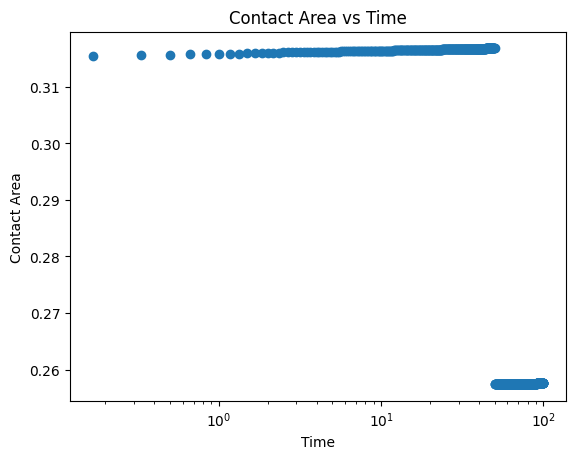

In [46]:

#plt.plot(range(time_steps), contact_area)
plt.scatter(np.arange(t0, t1, dt)+dt, contact_area)
plt.xlabel('Time')
plt.xscale("log")
plt.ylabel('Contact Area')
plt.title('Contact Area vs Time')
plt.show()

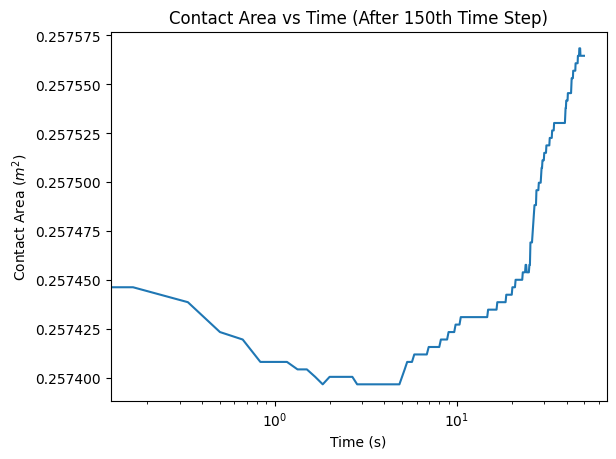

In [47]:
# Get the data after the 150th time step
contact_area_after_150 = contact_area[300:]

# Subtract the value of the 150th time step from all the time steps
time_after_150 = np.arange(0, len(contact_area_after_150)) * dt

# Plot the modified data
plt.plot(time_after_150, contact_area_after_150)
plt.xlabel("Time (s)")
plt.xscale("log")
plt.ylabel("Contact Area ($m^2$)")
plt.title("Contact Area vs Time (After 150th Time Step)")
plt.show()

Compared with experiment in Dilavou(2018)[2], it does look like we can get close to logarithmic aging. The deaging observed in Dillavou(2018)[2] looks difficult to get with our current model.



So we plan to have two analyses, we already know that the real contact area grows logarithmically in time, βlog(t - t*). First, we try `curve_fit` on the initial loading curve(first stage) for $\beta_1$ to see whether $\beta_1$ changes for different loading. Then we compare the $\beta_1$ and $\beta_2$ for aging stage and deaging stage.

#### Reference



[1] Amir, Ariel, Yuval Oreg, and Yoseph Imry. ‘On Relaxations and Aging of Various Glasses’. Proceedings of the National Academy of Sciences 109, no. 6 (7 February 2012): 1850–55. https://doi.org/10.1073/pnas.1120147109.

[2] Dillavou, Sam, and Shmuel M. Rubinstein. ‘Nonmonotonic Aging and Memory in a Frictional Interface’. Physical Review Letters 120, no. 22 (1 June 2018): 224101. https://doi.org/10.1103/PhysRevLett.120.224101.
